<small><i>May 2014-2023 - This notebook was created by [Oriol Pujol Vila](http://www.maia.ub.es/~oriol). Source and license info are in the folder.</i></small>

# Introduction to Machine Learning

CONCEPTS

## PART 1: A practical introduction to machine learning

1. About the software.

2. What is Machine Learning?

3. Modeling the machine learning problem

4. The supervised classification problem. A basic guided programatic example

    4.1 Representing the problem in sklearn
    
    4.2 Learning and predicting
    
    4.3 More about the feature space
    
    4.4 Training and testing
    
    4.5 Model selection (I)

## PART 2: Learning concepts and theory

5. What is learning?

    * PAC-learning
      
6. Inside the learning model

    * The human machine learning algorithm
    * Model class and hypothesis space
    * Objective function
    * Searching/Optimization/Learning algorithm
    
7. Learning curves and overfitting

    * Learning curves
    * Overfitting
        
8. Cures to overfitting

    * Model selection (II)
    * Regularization
    * Ensemble

## PART 3: First models

9. Two models
    1.	Support Vector Machines.
    2.	Ensemble methods (Bagging and Random Forest).

# PART 1: A practical introduction to Machine Learning

## 1. About the software: Scikit-Learn

+ Scikit-Learn is a Machine learning library writen in Python.
+ Simple and efficient, for both experts and non-experts.
+ Classical, well-established machine learning algorithms.
+ BSD 3 license.

### 1.1 Integration in the scientific Python ecosystem

The open source Python ecosystem provides a standalone, versatile and powerful scientific working environment, including:

+ NumPy (for efficient manipulation of multi-dimensional arrays);
+ SciPy (for specialized data structures (e.g., sparse matrices) and lower-level scientific algorithms),
+ IPython (for interactive exploration),
+ Matplotlib (for vizualization)
+ Pandas (for data management and data analysis)
+ (and many others...)

Scikit-Learn builds upon NumPy and SciPy and complements this scientific environment with machine learning algorithms; By design, Scikit-Learn is non-intrusive, easy to use and easy to combine with other libraries. We will use Scikit-Learn as a tool for understanding machine learning.

## 2. What is Machine Learning?

**Machine Learning** (ML) is about coding programs that automatically adjust their performance from exposure to information encoded in data. This learning is achieved via a parameterized model with tunable parameters automatically adjusted according to a performance criteria.

Machine Learning can be considered a subfield of Artificial Intelligence (AI).

There are three major classes of ML:

   1. Supervised learning : Algorithms which learn from a training set of labeled examples (exemplars) to generalize to the set of all possible inputs. Examples of techniques in supervised learning include regression and support vector machines.
    
   2. Unsupervised learning : Algorithms which learn from a training set of unlableled examples, using the features of the inputs to categorize inputs together according to some statistical criteria. Examples of unsupervised learning include k-means clustering and kernel density estimation.
    
   3. Reinforcement learning : Algorithms that learn via reinforcement from a critic that provides information on the quality of a solution, but not on how to improve it. Improved solutions are achieved by iteratively exploring the solution space. We will not cover RL in this course.

## 3. Modeling the machine learning problem

The first step to apply data science and machine learning is identifying an interesting question to answer. According to the type of answer we are seeking we are directly aiming for a certain set of techniques.

+ If our question is answered by *YES/NO*, we are in front of a **classification** problem. Classifiers are also the techniques to use if our question admits only a discrete set of answers, i.e. we want to select among a finite number of choices.  

    + Given a client profile and past activity, which are the financial products she would be most interested in?
    
    + Given the results of a clinical test, does this patient suffers from diabetes?
    
    + Given an Magnetic Resonance Image, is there a tumor in it?
    
    + Given the past activity associated to a credit card, is the current operation a fraud?
    
    + Given my skills and marks in computer science and maths, will I pass the data science course?

+ If our question is a prediction of a (usually real valued) quantity, we are in front of a **regression** problem.

    + Given the description of an appartment, which is the expected market value of the flat? What would the value be if the appartment has a elevator?
    
    + Given the past records of user activities on Apps, how long is a certain client be hocked to our App?
    
    + Given my skills and marks in computer science and maths, what mark will I achive?
    
    
Observe that some problems can be solved using both regression and classification. As we will see later many classification algorithms are thresholded regressors. There is a certain skill in designing the correct question and this dramatically change the solution we obtain. 

**TAKE HOME PRINCIPLE:** Our first designing principle to keep in mind is that in general if a problem can be solved using a simpler question do not use a more complex one. This is an instantiation of the famous KISS principle (*Keep It Simple, Stupid!*). 

<div class = "alert alert-success">**QUIZ:** Which of the following questions correspond to a classification problem?

<li> Weather forecast. 
<li> Is this behavior normal?
<li> Where are my keys in this picture? 
</div>

## 4. The supervised classification problem. A basic and guided programatic example.

 
In a supervised classification problem, given a set of examples with their corresponding label, our goal is to predict the membership of a given instance to one of a predefined discrete set of classes. 

Formally, we can describe the problem as follows: Consider a set *training set* composed of $N$ data sample pairs $\{(x_i,y_i)\}, \quad i =1,\dots,N$ where $x_i \in {\bf R}^d$ is described by $d$ features, and its corresponding supervised label, e.g. in the simplest binary case $y_i = \{-1,1\}$. Our goal is to find a model $h:{\bf R}^d \rightarrow {\bf R}$ such that given a new data sample $x$ it correctly predicts its label $y$, i.e. $h(x) = y$.

We have seen **supervised learning** before ... *regression*. Let us refresh the basic pipeline.


In machine learning we usually talk about two different steps:

+ **Training**. Given a set of data instances $x$ and their corresponding label $y$ we want to learn/<span style="color:red">fit</span> a model.

+ **Testing or exploitation**. Given a model we want to apply it to new unseen data in order to <span style="color:red">predict</span> its label.



Check the following example on how to handle **basic training** and **persistence**. We consider a visual problem in order to build up our intuition on the process. 

**The problem:** Consider the problem of handrwiten digits recognition. Given an image of a handwriten digit we want to build a classifier that recognizes the correct label.

Let us start loading the data set.

In [1]:
#Load data set.
from sklearn import datasets
digits = datasets.load_digits()

Now, check the data just loaded.

In [2]:
#Check the data format.
X, y = digits.data, digits.target

print (X.shape)
print (y.shape)

(1797, 64)
(1797,)


In [3]:
X[0,:]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [4]:
import numpy as np
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### 4.1 Representing a machine learning problem in Scikit-Learn

Recall the formalization of the problem where the training data set consists of $N$ data pairs $S = \{(x_i,y_i)\},\; i = 1\dots N$ where $x_i \in {\bf R}^d$ is composed of $d$ features/descriptors and $y_i \in \{1,\dots,K\}$ is a discrete target label. In our current problem, we have $N = 1797$ data examples of handwritten numbers. Each sample is an $8\times 8$ image. The representation of each data sample is encoded in vector. For this reason we flatten the image and reshape it to a vector with $d=64$ corresponding to the gray values/brightness of each pixel of the image. $y_i$ is the value of the target class the number belongs to.



Let us visualize the first digit.

(64,)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


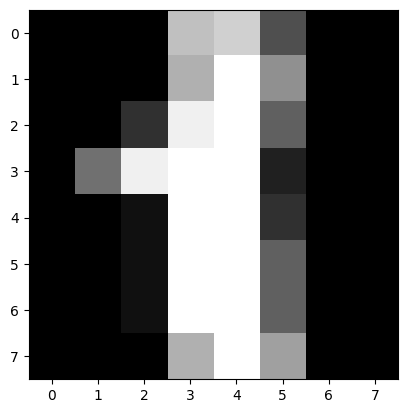

In [5]:
%matplotlib inline
# The original digit has been flattened, so we reshape it back to its original form
# Check the dimensionality of the data, e.g. the first element in the data set X[0]
print (X[0].shape)
print (X[0])

# Reshape it to 8x8 to recover the original image
print (X[0].reshape((8,8)))


# Show the image using scikit.image package
import matplotlib.pyplot as plt

plt.imshow(X[1].reshape((8,8)),cmap="gray",interpolation="nearest")


Let us check some of the examples we have in our data set.

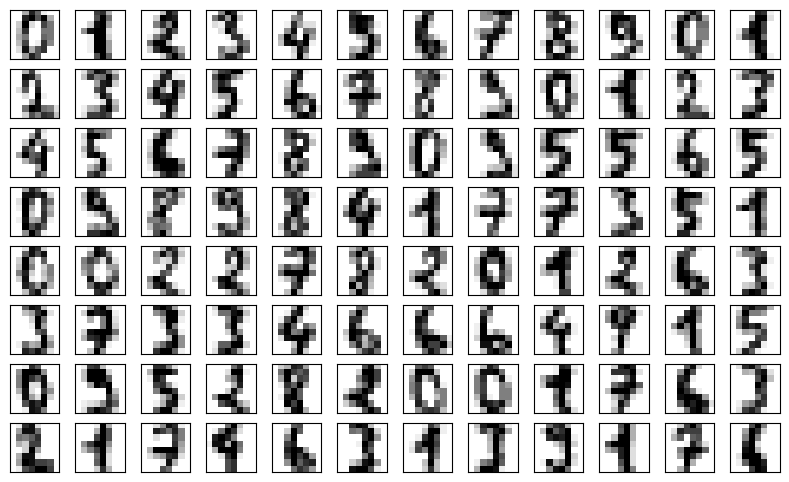

In [6]:
#Visualize some of the data.
import matplotlib.pyplot as plt
fig, ax = plt.subplots(8, 12, subplot_kw={'xticks':[], 'yticks':[]})
for i in range(ax.size):
    ax.flat[i].imshow(digits.data[i].reshape(8, 8),
                      cmap=plt.cm.binary)
fig.set_size_inches((10,6))

A problem in Scikit-Learn is modeled as follows:

+ Input data is structured in Numpy arrays. The size of the array is expected to be [n_samples, n_features]:

    + *n_samples*: The number of samples ($N$): each sample is an item to process (e.g. classify). A sample can be a document, a picture, a sound, a video, an astronomical object, a row in database or CSV file, or whatever you can describe with a fixed set of quantitative traits.
  
    + *n_features*: The number of features ($d$) or distinct traits that can be used to describe each item in a quantitative manner. Features are generally real-valued, but may be boolean, discrete-valued or even cathegorical.

$${\rm feature~matrix:~~~} {\bf X}~=~\left[
\begin{matrix}
x_{11} & x_{12} & \cdots & x_{1d}\\
x_{21} & x_{22} & \cdots & x_{2d}\\
x_{31} & x_{32} & \cdots & x_{3d}\\
\vdots & \vdots & \ddots & \vdots\\
\vdots & \vdots & \ddots & \vdots\\
x_{N1} & x_{N2} & \cdots & x_{Nd}\\
\end{matrix}
\right]$$

$${\rm label~vector:~~~} {\bf y}~=~ [y_1, y_2, y_3, \cdots y_N]$$
    

The number of features must be fixed in advance. However it can be very high dimensional (e.g. millions of features) with most of them being zeros for a given sample. 

**Example** *Consider a text document representation. Given a text document we want to build a representation for it. In this case we could use as a description of the document a dictionary with all possible words in our language and create a description of the document as the number of times a certain word appears in the document. Each document is a sample and each value counting the number of times a word appear in the text is a feature. Observe that a single document will use just a handful of words. Thus there are many words not used and their representation will be zero. This is a case where scipy.sparse matrices can be useful, in that they are much more memory-efficient than numpy arrays.*

#### Data set jargon

Considering data arranged as in the previous section we refer to:

+ the **columns** as features, attributes, dimensions, regressors, covariates, predictors, independent variables,
+ the **rows** as instances, examples, samples.
+ the **target** as label, outcome, response, dependent variable.

<div class = "alert alert-success">**QUESTION: ** Consider the following problem: *We are asked to develop a product similar to Shazzam(tm). This is, recognize the name of a song given a small sample of the music.*
<p>
Discuss and describe a posible feature vector for this problem with your partner.
</div>

### 4.2 Learning and predicting with Scikit-Learn

All objects in scikit-learn share a uniform and limited API consisting of three complementary interfaces:

+ an estimator interface for building and fitting models (.fit());
+ a predictor interface for making predictions (.predict());
+ a transformer interface for converting data.


Let us choose a model and fit the training data:

In [7]:
#Train a classifier using .fit()
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y) 

KNeighborsClassifier(n_neighbors=1)

In [8]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X,y)

SVC()

In [9]:
yhat = knn.predict(X)

In [10]:
yhat[18],y[18]

(8, 8)

In [11]:
#Save the model to disk (it can alternatively be stored in a string)
import pickle
ofname = open('my_classifier.pkl', 'wb')
s = pickle.dump(knn,ofname)
ofname.close()
print (s)

#Clear the namespace
%reset -f

None


In [12]:
#Check we don't have the variable in the namespace. This should give a NameError
print(knn)

NameError: name 'knn' is not defined

Now let us do some **exploitation** of the model. In this example we use the same data but in general new and unseen data is to be provided to the trained classifier.

In [13]:
from sklearn import neighbors
from sklearn import datasets

import pickle
ofname = open('my_classifier.pkl','rb') #Open in binary format. You never know how it was saved.
digits = datasets.load_digits()
X = digits.data
knn = pickle.load(ofname)

#Compute the prediction according to the model
print(knn.predict(X[0,:].reshape(1, -1)))
ofname.close()

[0]


In [14]:
#Check the target value.
y = digits.target
y[0]

0

In order to evaluate the performance of the classifier, prediction accuracy can used:
$$acc  = \frac{\mbox{# of correct predictions}}{N}$$

Each estimator has a *.score()* method that invokes the default scoring metric. In the case of k-Nearest Neighbors this is classification accuracy.

In [15]:
#Check the performance on the training set 
# - IF YOU KNOW WHAT YOU ARE DOING YOU WILL NEVER DO THIS AGAIN!
knn.score(X,y)

1.0

In [16]:
from sklearn import tree

#Entrenar
clf = tree.DecisionTreeClassifier()
clf.fit(X,y)

#Predecir
yhat = clf.predict(X)


import numpy as np

acc = np.mean(np.where(yhat == y,1.,0.))

print(acc,clf.score(X,y))


1.0 1.0


<div class = "alert alert-success"> **EXERCISE: ** Put all the problem steps in one cell and check it runs.
</div>

In [1]:
#EXERCISE
#Fill this cell with the exercise solution.
from sklearn import datasets
data= datasets.load_digits()
X,y = data.data, data.target


### 4.3 More intuition about the data: The feature space

Data is usually gathered as raw values. In the case of the digits dataset the gray values of the image. However, we can use domain knowledge we may consider important in order to discriminate the different classes. Take for instance two very simple derived features: horizontal, vertical symmetry and area. 

/Users/oriol/miniforge3/lib/python3.10/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


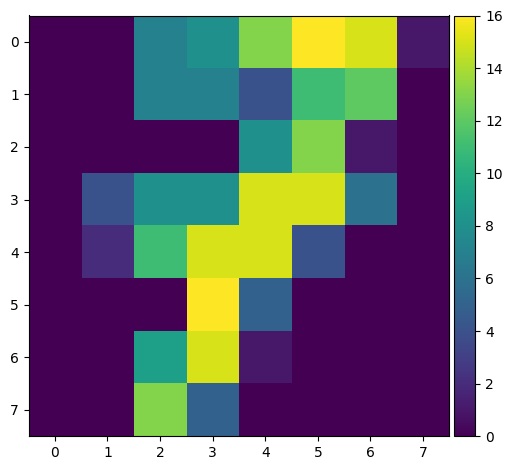

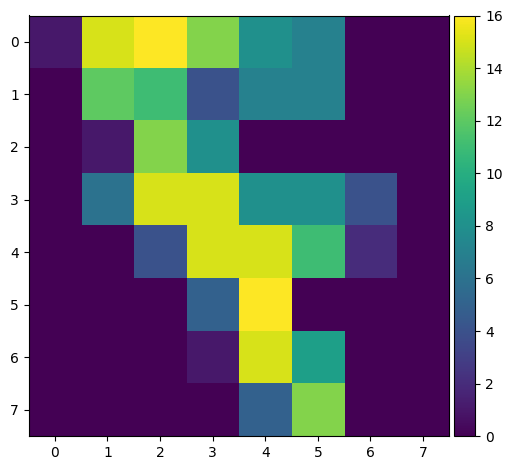

[[2808.  294. 2886.]
 [3670.  313. 3888.]
 [2810.  344. 3512.]
 ...
 [4776.  374. 4734.]
 [3656.  344. 3248.]
 [4422.  392. 4220.]]
(1797, 3)


In [2]:
from skimage import io as io

tmp = X[7].reshape((8,8))    
sym = tmp*tmp[:,::-1]
io.imshow(tmp)
io.show()
io.imshow(tmp[:,::-1])
io.show()

import numpy as np
Xnew = np.zeros((y.shape[0],3))
for i in range(y.shape[0]):
    area = sum(X[i])
    tmp = X[i].reshape((8,8))    
    symH = tmp*tmp[:,::-1]
    symV = tmp*tmp[::-1,:]
    
    Xnew[i,:]=[sum(symH.flatten()), area, sum(symV.flatten())]

print (Xnew)
print (Xnew.shape)

In [3]:
#Save this dataset for later use
import pickle
ofname = open('my_digits_data.pkl', 'wb')
s = pickle.dump([Xnew,y],ofname)
ofname.close()
print ('DONE')

DONE


In [4]:
import pickle
ofname = open('my_digits_data.pkl', 'rb')
data = pickle.load(ofname)

This is a three dimensional problem so we can easily visualize the feature space we have just created using matplotlib tools. We will select just two features and see how number 0 and number 6 differ.

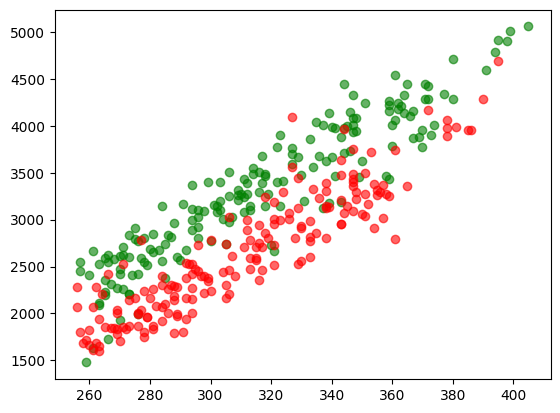

In [5]:
import matplotlib.pyplot as plt
idxA = y==0
idxB = y==6

feature1 = 1
feature2 = 2

plt.figure()
plt.scatter(Xnew[idxA, feature1], Xnew[idxA,feature2], c='green',alpha=0.6)
plt.scatter(Xnew[idxB, feature1], Xnew[idxB,feature2], c='red',alpha=0.6)
plt.show()

<div class = "alert alert-success"> **Exercise** Change feature1 and feature2 axis $\in \{0,1,2\}$ and select the most suitable view for classification purposes. Why did you select that view?
</div>

The process of using knowledge domain information in order to create discriminant features is called <span style="color:red">feature extraction</span>.

#### Raw data vs feature extraction

**Raw data**

Advantages:

+ No domain specific knowledge is required.

Drawbacks:

+ Highly redundant in many cases and usually span very large dimensional spaces.
+ Unknown discriminability.

**Feature extraction**

Advantages:

+ Attempt to capture discriminant information in the data.
+ Lower dimensionality and complexity.

Drawbacks: 

+ Domain specific knowledge is required.

<div class = "alert alert-success">**Exercise:** Train a new classifier on the new training set and check its training performance. Use a svm.SVC classifier. What is the score?
</div>

In [8]:
#EXERCISE
#TODO NOW!!!

#Use Xnew as training data and report 

from sklearn import svm
knn= svm.SVC()
knn.fit(Xnew,y)
y_pred=knn.predict(Xnew)
knn.score(Xnew,y)

0.2548692264885921

### 4.4 Measuring performance

There are different criteria for measuring performance of a classifier and the most adequate metric is usually problem dependent. When no prior information on the problem in given, we usually use classification accuracy. When we are in front of a multi-class problem (there are many classes to choose from) we may use the confusion matrix. The elements of the confusion matrix $M$ are defined as follows,
$$M(i,j) = \mbox{# of samples from class j predicted as class i}$$

Let us check these values:

classification accuracy: 0.2548692264885921


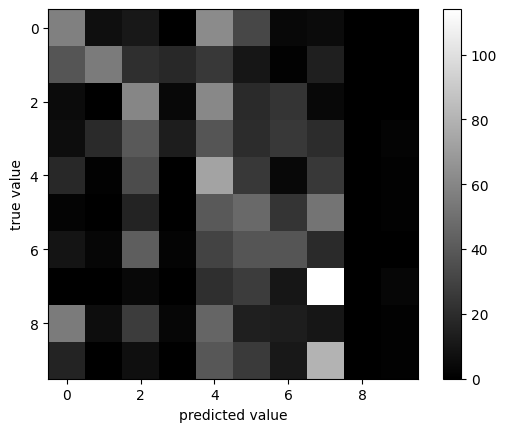

In [10]:
from sklearn import metrics

def plot_confusion_matrix(y, y_pred):
    plt.imshow(metrics.confusion_matrix(y, y_pred),
               cmap=plt.cm.gray, interpolation='nearest')
    plt.colorbar()
    plt.ylabel('true value')
    plt.xlabel('predicted value')
    
print ("classification accuracy:", metrics.accuracy_score(y, y_pred))
plot_confusion_matrix(y, y_pred)
#print metrics.classification_report(yhat,y)

<div class = "alert alert-success">**QUESTION:** Which are the classes with more confusion?
</div>

### 4.4 Training and testing. More intuition behind the learning process

Check the following code and its result:

classification accuracy: 1.0


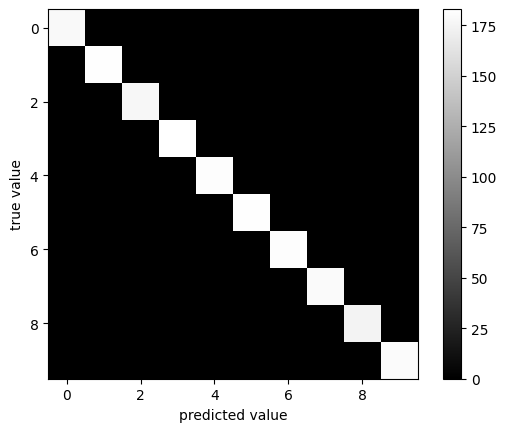

In [11]:
#Train a classifier using .fit()
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(Xnew,y)
yhat=knn.predict(Xnew)

print ("classification accuracy:", metrics.accuracy_score(yhat, y))
plot_confusion_matrix(y, yhat)


<div class = "alert alert-success">**QUESTION :** 

<li> Which is the accuracy of this classifier on the training set?
<li> Do we expect to work better than the former one on new data?
</div>

Up to this point we have checked the classifier performance on the same data it has been trained with. However in real applications data has not been previously seen. Let us simulate this effect splitting training data in two sets: One will be used for learning and the other for testing the accuracy performance.

[ 908 1113  749 ...  966 1689 1774]
(1258, 3) (539, 3) (1258,) (539,)

TRAINING STATS:
classification accuracy: 1.0


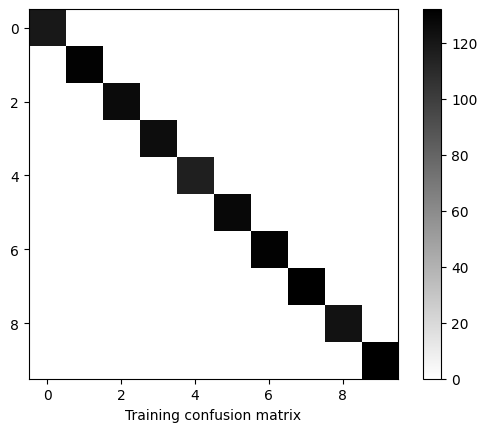

In [14]:
#Reset workspace
%reset -f

#Load our old digits dataset 
import pickle
ofname = open('my_digits_data.pkl', 'rb')
data = pickle.load(ofname)
X = data[0]
y = data[1]
ofname.close()


# Simulate a real case: Randomize and split data in two subsets PRC*100% for training and 
# the rest (1-PRC)*100% for testing
import numpy as np
perm = np.random.permutation(y.size)
print (perm)
PRC = 0.7
split_point = int(np.ceil(y.shape[0]*PRC))

X_train = X[perm[:split_point].ravel(),:]
y_train = y[perm[:split_point].ravel()]

X_test = X[perm[split_point:].ravel(),:]
y_test = y[perm[split_point:].ravel()]

print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Train a classifier on training data
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

#Check on the training set and visualize performance
yhat=knn.predict(X_train)
from sklearn import metrics
import matplotlib.pyplot as plt
print ("\nTRAINING STATS:")
print ("classification accuracy:", metrics.accuracy_score(yhat, y_train))
plt.imshow(metrics.confusion_matrix(y_train, yhat),
               cmap=plt.cm.binary, interpolation='nearest')
plt.xlabel('Training confusion matrix')
plt.colorbar()


TESTING STATS:
classification accuracy: 0.22820037105751392


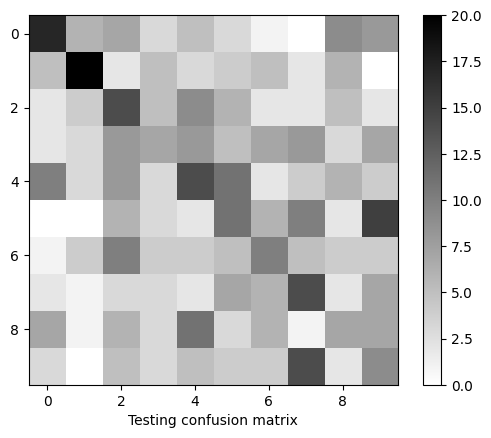

In [15]:
#Check on the test set and visualize performance
yhat=knn.predict(X_test)
print ("TESTING STATS:")
print ("classification accuracy:", metrics.accuracy_score(yhat, y_test))
plt.figure()
plt.imshow(metrics.confusion_matrix(y_test, yhat),
               cmap=plt.cm.binary, interpolation='nearest')
plt.xlabel('Testing confusion matrix')
plt.colorbar()

<div class = "alert alert-success">**QUESTION : ** Describe what is going on.
</div>

Observe that each time we run this process we reach a different performance. A good simulation for approximating the test error is to run multiple times this process and average the performances. Let us do this!

In [16]:
#The splitting can be done using the tools provided by sklearn:
from sklearn import model_selection

from sklearn import neighbors
from sklearn import metrics

PRC = 0.3
acc=np.zeros((10,))
for i in range(10):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=PRC)
    knn = neighbors.KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train,y_train)
    yhat=knn.predict(X_test)
    acc[i] = metrics.accuracy_score(yhat, y_test)
acc.shape=(1,10)
print ("Mean expected error: "+str(np.mean(acc[0])))



Mean expected error: 0.21888888888888886


In [17]:
acc

array([[0.21296296, 0.22962963, 0.20740741, 0.21851852, 0.21296296,
        0.25925926, 0.19074074, 0.20555556, 0.22777778, 0.22407407]])

Let us introduce the nomenclature for the quantities we have just computed. We define:

+ **In-sample error** $E_{\text{in}}$: The in-sample error or training error is the error measured over all the observed data samples in the training set, i.e.

$$E_{\text{in}} = \frac{1}{N}\sum\limits_{i=1}^{N} e(x_i,y_i)$$

+ **Out-of-sample error** $E_{\text{out}}$: The out-of-sample error or generalization error measure the expected error on unseen data. We can approximate this quantity holding out some training data for testing purposes.

$$E_{\text{out}}=\mathbb{E}_{x,y}(e(x,y))$$

Observe that there is still missing the definition of the instantaneous error $e(x_i,y_i)$. For example, in classification we could use the indicator fucntion to account for a correctly classified sample as follows

$$e(x_i,y_i) = I[h(x_i)=y_i] =\left\{\begin{align} 1 & \text{if}\; h(x_i)=y_i\\
0 & \text{otherwise} \\ \end{align}
\right.$$


Note that

$$E_{\text{out}} \geq E_{\text{in}}$$

### 4.5 Model Selection (I)



Using the expected error on the test set, we can select the best classifier for our application. This is called **model selection**. In this example we cover the most simplistic setting. Suppose we have a set of different classifiers and want to select the "best" one. We may use the one that yields the lowest error rate. 

[Text(1, 0, '1-NN'),
 Text(2, 0, '3-NN'),
 Text(3, 0, 'SVM'),
 Text(4, 0, 'Decission Tree')]

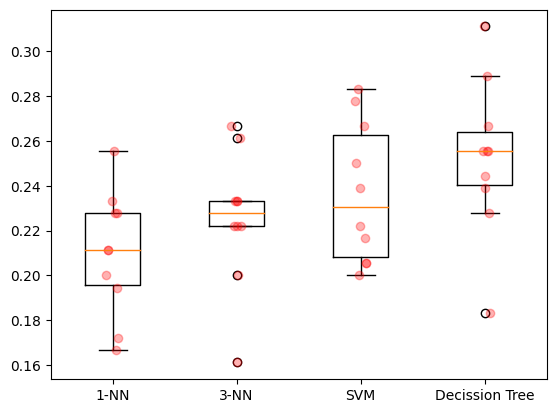

In [18]:
#The splitting can be done using the tools provided by sklearn:
from sklearn import model_selection
from sklearn import neighbors
from sklearn import tree
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt

PRC = 0.1
acc_r=np.zeros((10,4))
for i in range(10):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=PRC)
    nn1 = neighbors.KNeighborsClassifier(n_neighbors=1)
    nn3 = neighbors.KNeighborsClassifier(n_neighbors=3)
    svc = svm.SVC()
    dt = tree.DecisionTreeClassifier()
    
    nn1.fit(X_train,y_train)
    nn3.fit(X_train,y_train)
    svc.fit(X_train,y_train)
    dt.fit(X_train,y_train)
    
    yhat_nn1=nn1.predict(X_test)
    yhat_nn3=nn3.predict(X_test)
    yhat_svc=svc.predict(X_test)
    yhat_dt=dt.predict(X_test)
    
    acc_r[i][0] = metrics.accuracy_score(yhat_nn1, y_test)
    acc_r[i][1] = metrics.accuracy_score(yhat_nn3, y_test)
    acc_r[i][2] = metrics.accuracy_score(yhat_svc, y_test)
    acc_r[i][3] = metrics.accuracy_score(yhat_dt, y_test)


plt.boxplot(acc_r);
for i in range(4):
    xderiv = (i+1)*np.ones(acc_r[:,i].shape)+(np.random.rand(10,)-0.5)*0.1
    plt.plot(xderiv,acc_r[:,i],'ro',alpha=0.3)
    
ax = plt.gca()
ax.set_xticklabels(['1-NN','3-NN','SVM','Decission Tree'])

This process is one particular form of a general model selection technique called **cross-validation**. There are other kinds of cross-validation, such as **leave-one-out** or **K-fold cross-validation**. 

+ In leave-one-out, given $N$ samples the model is trained with $N-1$ samples and tested with the remaining one. This is repeated $N$ times, once per training sample and the result is averaged. 

+ In K-fold cross-validation the training set is divided in K non-overlapping splits. K-1 splits are used for training and the remaining one used for assessing the mean. This process is repeated $K$ times leaving one split out each time. The results are averaged. We can compute an approximation to the confidence interval using this method.

[Text(1, 0, '1-NN'),
 Text(2, 0, '3-NN'),
 Text(3, 0, 'SVM'),
 Text(4, 0, 'Decission Tree')]

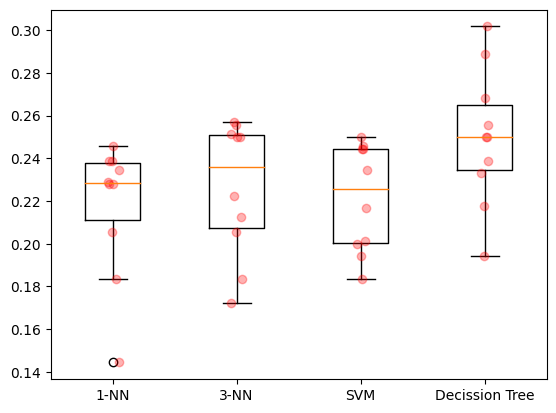

In [19]:
from sklearn import model_selection
from sklearn import neighbors
#Create a 10-fold cross validation set
acc = np.zeros((10,4))

kf=model_selection.KFold(n_splits=10, shuffle=False)
kf.get_n_splits()

i=0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    nn1 = neighbors.KNeighborsClassifier(n_neighbors=1)
    nn3 = neighbors.KNeighborsClassifier(n_neighbors=3)
    svc = svm.SVC()
    dt = tree.DecisionTreeClassifier()
    
    nn1.fit(X_train,y_train)
    nn3.fit(X_train,y_train)
    svc.fit(X_train,y_train)
    dt.fit(X_train,y_train)
    
    yhat_nn1=nn1.predict(X_test)
    yhat_nn3=nn3.predict(X_test)
    yhat_svc=svc.predict(X_test)
    yhat_dt=dt.predict(X_test)
    
    acc[i][0] = metrics.accuracy_score(yhat_nn1, y_test)
    acc[i][1] = metrics.accuracy_score(yhat_nn3, y_test)
    acc[i][2] = metrics.accuracy_score(yhat_svc, y_test)
    acc[i][3] = metrics.accuracy_score(yhat_dt, y_test)
    i=i+1
    
plt.boxplot(acc);
for i in range(4):
    xderiv = (i+1)*np.ones(acc[:,i].shape)+(np.random.rand(10,)-0.5)*0.1
    plt.plot(xderiv,acc[:,i],'ro',alpha=0.3)
    
ax = plt.gca()
ax.set_xticklabels(['1-NN','3-NN','SVM','Decission Tree'])    
    

[Text(1, 0, '1-NN'),
 Text(2, 0, '1-NN'),
 Text(3, 0, '3-NN'),
 Text(4, 0, '3-NN'),
 Text(5, 0, 'SVM'),
 Text(6, 0, 'SVM'),
 Text(7, 0, 'Decission Tree'),
 Text(8, 0, 'Decission Tree')]

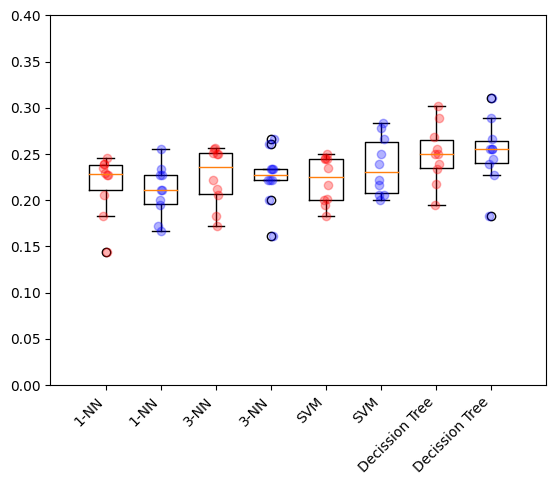

In [20]:
#Just for fun let us put both plots together
fig = plt.figure()
ax = plt.gca()
for i in range(4):
    plt.boxplot([acc[:,i], acc_r[:,i]], positions = [2*i+1,2*i+2], widths = 0.6)
    xderiv = (2*i+1)*np.ones(acc[:,i].shape)+(np.random.rand(10,)-0.5)*0.1
    plt.plot(xderiv,acc[:,i],'ro',alpha=0.3)
    xderiv = (2*i+2)*np.ones(acc[:,i].shape)+(np.random.rand(10,)-0.5)*0.1
    plt.plot(xderiv,acc_r[:,i],'bo',alpha=0.3)
# set axes limits and labels
plt.xlim(0,9)
plt.ylim(0,0.4)
ax.set_xticklabels(['1-NN','1-NN','3-NN','3-NN','SVM','SVM','Decission Tree','Decission Tree'],rotation = 45, ha="right")
#ax.set_xticks([1.5, 2.5, 3.5, 4.5 , 5.5, 6.5,7.5,8.5])


### Summary: Scikit-learn's estimator interface

Scikit-learn strives to have a uniform interface across all methods,
and we'll see examples of these below. Given a scikit-learn *estimator*
object named `model`, the following methods are available:

- Available in **all Estimators**
  + `model.fit()` : fit training data. For supervised learning applications,
    this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`).
    For unsupervised learning applications, this accepts only a single argument,
    the data `X` (e.g. `model.fit(X)`).
- Available in **supervised estimators**
  + `model.predict()` : given a trained model, predict the label of a new set of data.
    This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`),
    and returns the learned label for each object in the array.
  + `model.predict_proba()` : For classification problems, some estimators also provide
    this method, which returns the probability that a new observation has each categorical label.
    In this case, the label with the highest probability is returned by `model.predict()`.
  + `model.score()` : for classification or regression problems, most (all?) estimators implement
    a score method.  Scores are between 0 and 1, with a larger score indicating a better fit.
- Available in **unsupervised estimators**
  + `model.transform()` : given an unsupervised model, transform new data into the new basis.
    This also accepts one argument `X_new`, and returns the new representation of the data based
    on the unsupervised model.
  + `model.fit_transform()` : some estimators implement this method,
    which more efficiently performs a fit and a transform on the same input data.

# PART 2: Learning concepts and theory

# 1. What is learning?

Let us recall the two basic values defined in the last notebook. We talk about *training error* or *in-sample error*, $E_{\text{in}}$, referring to the error measured over all the observed data samples in the training set. We talk about *testing error* or *generalization error*, $E_{\text{out}}$, as the expected error on unseen data. 

We can empirically estimate the generalization error by means of cross-validation techniques and observe that

$$E_{\text{out}} \geq E_{\text{in}}.$$

The goal of learning is to minimize the generalization error, but how can we guarantee this minimization only using training data?

From the above inequality it is easy to derive a couple of very intuitive ideas:

+ Because $E_{\text{out}}$ is greater than or equal to $E_{\text{in}}$, it is desirable to have $$E_{\text{in}} \rightarrow 0.$$

+ Additionally, we also want the training error behavior to track the generalization error, i.e. $$E_{\text{out}}\approx E_{\text{in}}.$$

We can rewrite this second condition as 
$$E_{\text{in}} \leq E_{\text{out}} \leq E_{\text{in}} + \Omega,$$
with $\Omega \rightarrow 0$.

## Probably approximately correct learning.

We would like to characterize $\Omega$ in terms of our problem parameters, i.e. number of samples ($N$), dimensionality of the problem ($d$), etc. 

Statistic analysis offers an interesting characterization of this quantity 

$$E_{\text{out}} \leq E_{\text{in}} + \mathcal{O}\big(\sqrt{\frac{\log{C}}{N}}\big),$$

where $C$ is a measure of complexity of the model class we are using. Technically, we may refer to this model class also as the hypothesis space.

<div class = "alert alert-success">**QUIZ:** 
<li> Which will be the effect of having a large number of data? 
<li> Will selecting a model with small complexity reduce the out of sample error?
</div>

Before going further in this matter let us open the box of the learning process and observe which parts it is composed of.

# 2. Inside the learning process

Consider a simple two dimensional problem.

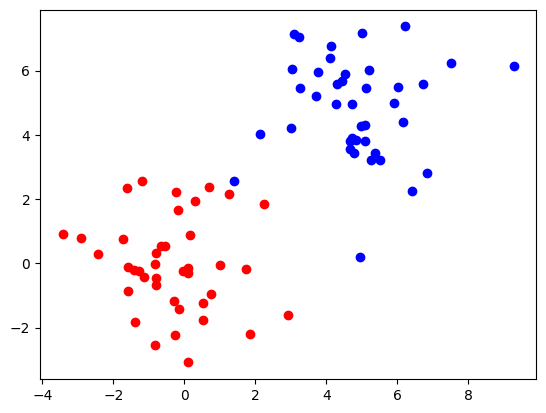

In [21]:
%matplotlib inline
#from sklearn import 
import numpy as np
#Create some data
X = np.concatenate([1.25*np.random.randn(40,2),5+1.5*np.random.randn(40,2)]) 
y = np.concatenate([np.ones((40,1)),-np.ones((40,1))])

#Visualize
import matplotlib.pyplot as plt
plt.scatter(X[0:40,0],X[0:40,1],color='r')
plt.scatter(X[40:,0],X[40:,1],color='b')

In order to be able to learn, any algorithm has to define at least three components:

+ **The model class/hypothesis space** defines the family of mathematical models that will be used. The target decision boundary will be approximated from one element of this space. For example, we can consider the class of linear models. In this case our decision boundary will be a line if the problem is defined in ${\bf R}^2$ and the model class is the space of all posible lines in ${\bf R}^2$. 

    Model classes define the geometric properties of the decision function. There are different taxonomies but the most well-known are the *families* of **linear** and **non-linear** models. These families usually depend on some parameters. And the solution to a learning problem is the selection of a particular set of parameters, i.e. the selection of an instance model from the model class space. The model class space is also called **hypothesis space**.

    The selection of the best model will depend on our problem and what we want to obtain from the problem. The primary goal in learning is usually achieving the minimum error/maximum performance. But according to what else we want from the algorithm we will find different algorithms. Other common desirable properties are interpretability, behavior in front of missing data, fast training, etc.


+ **The problem model** formalizes and encodes the desired properties of the solution. In many cases this formalization takes the form of an optimization problem. In it most basic instantiation, the problem model can be the **minimization of an error function**. The error function measures the difference between our model and the target one. Informally speaking, in a classification problem it measures how "irritated" we are when our model misses the right label of a training sample. For example, in classification the ideal error function is the **0-1 loss**. This function takes value $1$ when we incorrectly classify a training sample and zero otherwise. In this case, it can be intrepreted that one is only irritated by "one unit of irritation" when one sample is misclassified.

    Problem model can also be used to impose other constraints on our solution, such as finding a smooth approximation, small complexity model, sparse solution, etc.
    
    
+ **The learning algorithm** is an optimization/search method or algorithm that given a model class fits it to the training data according to the error function. According to the nature of our problem there are many different algorithms. In general, we are talking about finding the minimum error approximation or maximum probable model. In those cases, if the problem is convex/quasi-convex we will typically use first or second order methods (i.e. gradient descent, coordinate descent, Newton's method, Interior Point methods, etc). Other searching techniques such as genetic algorithms or monte-carlo techniques can be used if we do not have access to the derivatives of the objective function.


Let us use the "human machine learning" algorithm. You move the parameters until you feel the solution is correct.

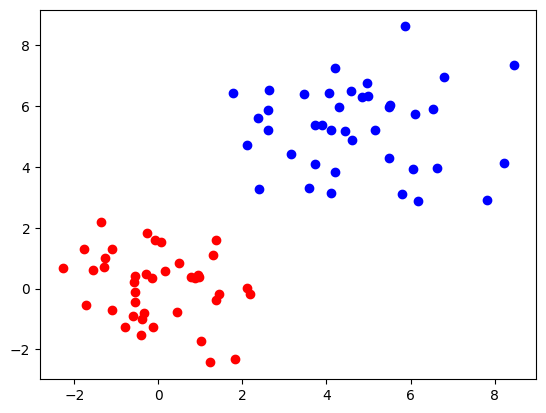

interactive(children=(FloatSlider(value=0.0, description='w0', max=10.0, min=-10.0), FloatSlider(value=0.0, de…

In [22]:
%matplotlib inline
#from sklearn import 
import numpy as np
#Create some data
X = np.concatenate([1.25*np.random.randn(40,2),5+1.5*np.random.randn(40,2)]) 
y = np.concatenate([np.ones((40,1)),-np.ones((40,1))])

#Visualize
import matplotlib.pyplot as plt
from ipywidgets import interact

def human_learning_algorithm(X,y):
    
    plt.scatter(X[0:40,0],X[0:40,1],color='r')
    plt.scatter(X[40:,0],X[40:,1],color='b')
    #plt.scatter(X[0:40,0],X[0:40,1],color='r')
    #plt.scatter(X[40:,0],X[40:,1],color='b')    
    delta = 0.025
    xx = np.arange(-5.0, 10.0, delta)
    yy = np.arange(-5.0, 10.0, delta)
    XX, YY = np.meshgrid(xx, yy)
    Xf = XX.flatten()
    Yf = YY.flatten()
    sz=XX.shape
    data = np.concatenate([Xf[:,np.newaxis],Yf[:,np.newaxis]],axis=1);

    def hml_display(w0,w1,offset):
        w=np.array([w0,w1])
        w.shape=(2,1)
        #Evaluate the model for a given weight
        Z = data.dot(w)+offset
        Z.shape=sz
        plt.scatter(X[0:40,0],X[0:40,1],color='r')
        plt.scatter(X[40:,0],X[40:,1],color='b')
        plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,10,-5,10),alpha=0.3, vmin=-15, vmax=15)
        plt.contour(XX,YY,Z,[0])
        fig = plt.gcf()
        fig.set_size_inches(9,9)
   
    #Ipython 2.0      
    interact(hml_display, w0=(-10.,10.), w1=(-10.,10.), offset=(-20.,40.));
    #Ipython 1.1 back compatibility
    #w0=-10. #-10.,10.
    #w1=-10. #-10.,10.
    #offset=-20. #-20.,40.
    #hml_display(w0,w1,offset) 

    
human_learning_algorithm(X,y)



<div class = "alert alert-success">**QUESTION:** Describe the process you used for fitting the classifier
</div>

<div class = "alert alert-info">**Some notes on the learning process**
<p>
The main goal of any learning process is to achive the maximum predictive power (*accuracy*). This is minimize the error. However, there are three other important properties we usually desire our models to have:

<p>
<li> **Simplicity** - how much fiddling do we need for the method to work? Can I modify it to handle the particularities of my problem?
<li> **Speed** - How long does it take to train a reliable model? (training time) Can I use it in embedded and real time applications? (testing time), How long do I have to wait for processing my 1YB (yottabyte - 1e24 Bytes) dataset?
<li> **Interpretability** - Why did it make these predictions?

<p>
It happens that accuracy trades off with all the rest of the desirable properties. 
</div>

# 3. Learning curves and overfitting.

Let us go back to PAC learnability.

In [23]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from sklearn import neighbors

MAXC=50
MAXN=1000
X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
X = np.concatenate([X,[8,5]+1.5*np.random.randn(MAXN,2)])
y = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
y = np.concatenate([y,np.ones((MAXN,1))])
perm = np.random.permutation(y.size)
X = X[perm,:]
y = y[perm]


def complexity_number(C,N):
    
    Xr=X[:N,:]
    yr=y[:N]
    idxplus = yr==1
    idxminus = yr==-1
    idxplus = idxplus.flatten()
    idxminus = idxminus.flatten()
    plt.scatter(Xr[idxplus,0],Xr[idxplus,1],color='r')
    plt.scatter(Xr[idxminus,0],Xr[idxminus,1],color='b')   
    delta = 0.05
    xx = np.arange(-5.0, 15.0, delta)
    yy = np.arange(-5.0, 15.0, delta)
    XX, YY = np.meshgrid(xx, yy)
    Xf = XX.flatten()
    Yf = YY.flatten()
    sz=XX.shape
    data = np.concatenate([Xf[:,np.newaxis],Yf[:,np.newaxis]],axis=1);
    #Evaluate the model for a given weight
    clf = neighbors.KNeighborsClassifier(MAXC-C+1)
    clf.fit(Xr,yr.ravel())
    Z=clf.predict(data)
    Z.shape=sz
    plt.scatter(Xr[idxplus,0],Xr[idxplus,1],color='r')
    plt.scatter(Xr[idxminus,0],Xr[idxminus,1],color='b')
    plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=-1, vmax=1)
    plt.contour(XX,YY,Z,[0])
    fig = plt.gcf()
    fig.set_size_inches(9,9)
   
#Ipython 2.0
interact(complexity_number,  C=(1,MAXC), N = (20,MAXN));
#Ipython 1.1.
#C=1 #1...50
#N = 20 #20...1000
#complexity_number(C,N)

interactive(children=(IntSlider(value=25, description='C', max=50, min=1), IntSlider(value=510, description='N…

<div class = "alert alert-success">**EXERCISE: ** 
<li> Set the number of data samples per cluster $N$ to $100$ and the complexity value $C$ to $50$. Describe what you observe: Does the method missclassify any data sample? 
<li> Decrease the complexity value to $C = 20$. Describe the boundary: Does the method missclassify any data sample?
<li> Which of the two settings do you think will perform the best in front of new data from the same distribution? Why?
<li> Increase the number of data points to $N = 1000$ with $C=50$. Describe what you observe. Will the method perform better than the same method with $N=100$?
</div>

## 3.1 Learning curves.

Let us visualize the behavior observed. For this purpose we may draw a curve of the training error and test error as the number of training data increases for a given complexity. This curve is called **learning curve**.

Text(0, 0.5, 'Error rate')

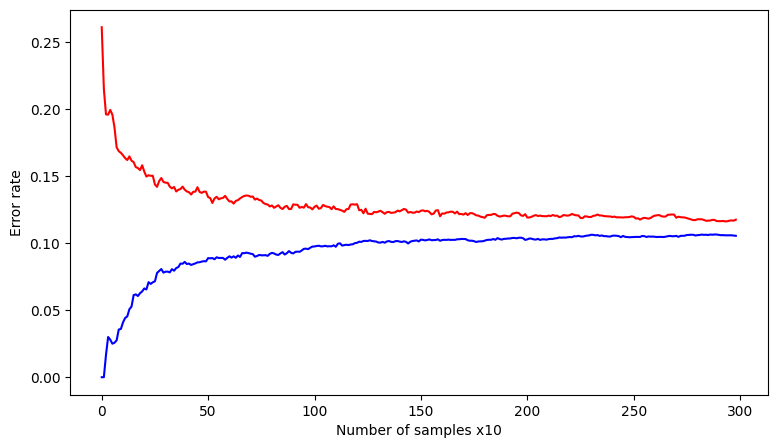

In [24]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from sklearn import metrics
from sklearn import tree

C=5
MAXN=1000

yhat_test=np.zeros((10,299,2))
yhat_train=np.zeros((10,299,2))
#Repeat ten times to get smooth curves
for i in range(10):
    X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
    X = np.concatenate([X,[8,5]+1.5*np.random.randn(MAXN,2)])
    y = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
    y = np.concatenate([y,np.ones((MAXN,1))])
    perm = np.random.permutation(y.size)
    X = X[perm,:]
    y = y[perm]

    X_test = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
    X_test = np.concatenate([X_test,[8,5]+1.5*np.random.randn(MAXN,2)])
    y_test = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
    y_test = np.concatenate([y_test,np.ones((MAXN,1))])
    j=0
    for N in range(10,3000,10):
        Xr=X[:N,:]
        yr=y[:N]
        idxplus = yr==1
        idxminus = yr==-1
        idxplus = idxplus.flatten()
        idxminus = idxminus.flatten()
        #Evaluate the model
        clf = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=C)
        clf.fit(Xr,yr.ravel())
        yhat_test[i,j,0] = 1. - metrics.accuracy_score(clf.predict(X_test), y_test.ravel())
        yhat_train[i,j,0] = 1. - metrics.accuracy_score(clf.predict(Xr), yr.ravel())
        j=j+1

plt.plot(np.mean(yhat_test[:,:,0].T,axis=1),'r')
plt.plot(np.mean(yhat_train[:,:,0].T,axis=1),'b')
fig = plt.gcf()
fig.set_size_inches(9,5)
plt.xlabel('Number of samples x10')
plt.ylabel('Error rate')

Observing the former plot we can see:

+ As the number of training samples increase both errors tends to the same value, **bias**.
+ When we have a little amount of training data, training error is very small but test error is very large.

Check now the learning curve when the complexity is smaller.

Text(0, 0.5, 'Error rate')

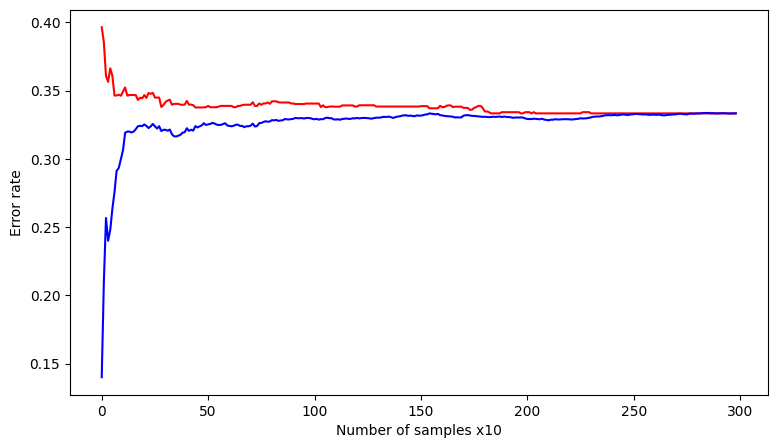

In [25]:


C=1
MAXN=1000

#Repeat ten times to get smooth curves
for i in range(10):
    X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
    X = np.concatenate([X,[8,5]+1.5*np.random.randn(MAXN,2)])
    y = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
    y = np.concatenate([y,np.ones((MAXN,1))])
    perm = np.random.permutation(y.size)
    X = X[perm,:]
    y = y[perm]

    X_test = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
    X_test = np.concatenate([X_test,[8,5]+1.5*np.random.randn(MAXN,2)])
    y_test = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
    y_test = np.concatenate([y_test,np.ones((MAXN,1))])
    j=0
    for N in range(10,3000,10):
        Xr=X[:N,:]
        yr=y[:N]
        idxplus = yr==1
        idxminus = yr==-1
        idxplus = idxplus.flatten()
        idxminus = idxminus.flatten()
        #Evaluate the model
        clf = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=C)
        clf.fit(Xr,yr.ravel())
        yhat_test[i,j,1] = 1. - metrics.accuracy_score(clf.predict(X_test), y_test.ravel())
        yhat_train[i,j,1] = 1. - metrics.accuracy_score(clf.predict(Xr), yr.ravel())
        j=j+1

plt.plot(np.mean(yhat_test[:,:,1].T,axis=1),'r')
plt.plot(np.mean(yhat_train[:,:,1].T,axis=1),'b')
fig = plt.gcf()
fig.set_size_inches(9,5)
plt.xlabel('Number of samples x10')
plt.ylabel('Error rate')

We can see a similar behavior in this second curve. Let us compare the two plots.

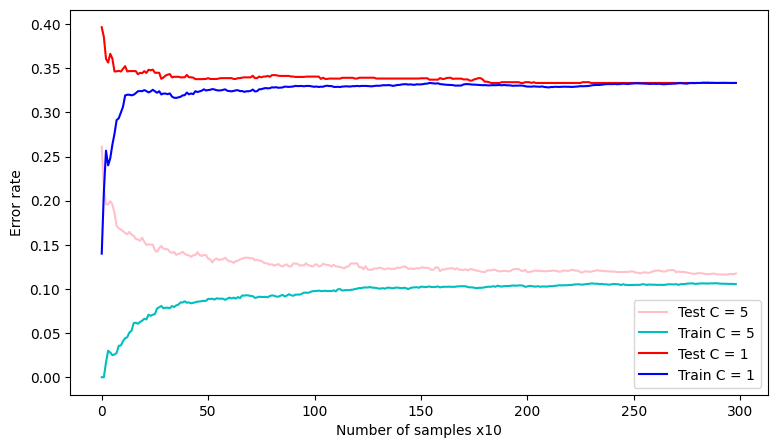

In [26]:
p1,=plt.plot(np.mean(yhat_test[:,:,0].T,axis=1),color='pink')
p2,=plt.plot(np.mean(yhat_train[:,:,0].T,axis=1),'c')
p3,=plt.plot(np.mean(yhat_test[:,:,1].T,axis=1),'r')
p4,=plt.plot(np.mean(yhat_train[:,:,1].T,axis=1),'b')
fig = plt.gcf()
fig.set_size_inches(9,5)
plt.xlabel('Number of samples x10')
plt.ylabel('Error rate')
plt.legend([p1,p2,p3,p4],["Test C = 5","Train C = 5","Test C = 1","Train C = 1"])

Although both show a similar behavior we note several differences:

+ With small complexity training and test errors converge sooner/with a smaller amount of data.
+ However, with small complexity, the error of converge is larger than with increased complexity.

>The value towards both errors converge is also called **bias**, and the difference between this value and the test error is called **variance**. The **bias/variance** decomposition of the learning curve is an alternative view to the training and generalization view.

## 3.2 Overfitting.

Let us now plot the learning behavior for a fixed number of examples with respect to the complexity of the model.

<div class = "alert alert-success">**QUESTION: ** What do you expect to happen?
</div>

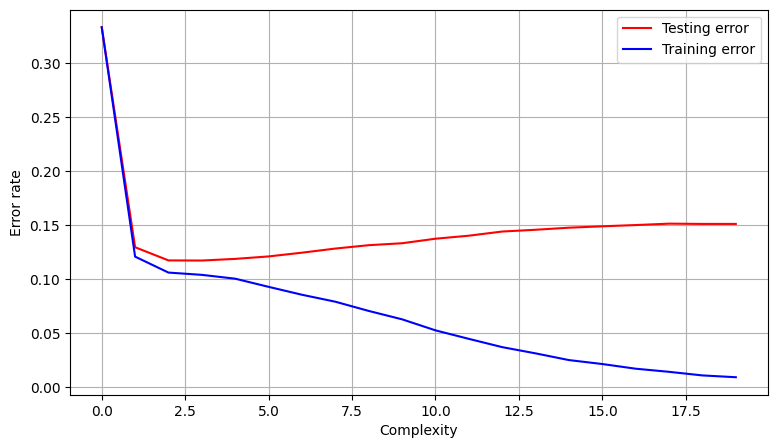

In [27]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from sklearn import metrics
from sklearn import tree

MAXC=20
N=1000
NTEST=4000
ITERS=3

yhat_test=np.zeros((ITERS,MAXC,2))
yhat_train=np.zeros((ITERS,MAXC,2))
#Repeat ten times to get smooth curves
for i in range(ITERS):
    X = np.concatenate([1.25*np.random.randn(N,2),5+1.5*np.random.randn(N,2)]) 
    X = np.concatenate([X,[8,5]+1.5*np.random.randn(N,2)])
    y = np.concatenate([np.ones((N,1)),-np.ones((N,1))])
    y = np.concatenate([y,np.ones((N,1))])
    perm = np.random.permutation(y.size)
    X = X[perm,:]
    y = y[perm]

    X_test = np.concatenate([1.25*np.random.randn(NTEST,2),5+1.5*np.random.randn(NTEST,2)]) 
    X_test = np.concatenate([X_test,[8,5]+1.5*np.random.randn(NTEST,2)])
    y_test = np.concatenate([np.ones((NTEST,1)),-np.ones((NTEST,1))])
    y_test = np.concatenate([y_test,np.ones((NTEST,1))])
    
    idxplus = y==1
    idxminus = y==-1
    idxplus = idxplus.flatten()
    idxminus = idxminus.flatten()
    j=0
    for C in range(1,MAXC+1):
        #Evaluate the model
        clf = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=C)
        clf.fit(X,y.ravel())
        yhat_test[i,j,0] = 1. - metrics.accuracy_score(clf.predict(X_test), y_test.ravel())
        yhat_train[i,j,0] = 1. - metrics.accuracy_score(clf.predict(X), y.ravel())
        j=j+1

p1, = plt.plot(np.mean(yhat_test[:,:,0].T,axis=1),'r')
p2, = plt.plot(np.mean(yhat_train[:,:,0].T,axis=1),'b')
fig = plt.gcf()
fig.set_size_inches(9,5)
plt.xlabel('Complexity')
plt.ylabel('Error rate')
plt.legend([p1, p2], ["Testing error", "Training error"])
plt.grid(True)

Observe that as the complexity increases the training error is reduced but above a certain complexity level the test error increases. This effect is called **overfitting**.

<div class = "alert alert-success">**QUESTION: ** Let us go back to regression problems. Consider that we know the underlying model generating data samples. For example, data is generated by a 10th order polynomial. Mark all the correct answers:

<li> I will use a 10th order polynomial as my model.
<li> I will use a 2nd order polynomial as my model.
<li> If I have a small number of data I have to use a small order polynomial.
<li> If I have a large amount of data I may use a tenth order polynomial.
</div>

# 4. Cures to overfitting.

We may find three cures to overfitting:

+ Observe that models are usually parameterized by some hyper-parameters. Selecting the complexity is usually governed by some of such parameters. Thus we are in front of a model selection problem. A good heuristic for selecting the model is to choose the value of the hyperparameters that yield the smallest estimated testing error. Remember that this can be done using **cross-validation**.

+ We may also change the formulation of the objective function to penalize complex models. This is called **regularization**.

+ We may use **ensembles**.

## 4.1 Cure I: Use model selection.

We have seen model selection before when we wanted to compare the performance of different classifiers. In that case, our best bet was to select the classifier with the smallest ${E}_{\text{out}}$. 

> **IDEA:** Analogous to model selection we may think of selecting the best hyper-parameters as choosing the classifier with parameters that performs the best. Thus, we may select a set of hyper-parameter values and use cross-validation to select the best configuration.

The process of selecting the best hyper-parameters is called **validation**. 

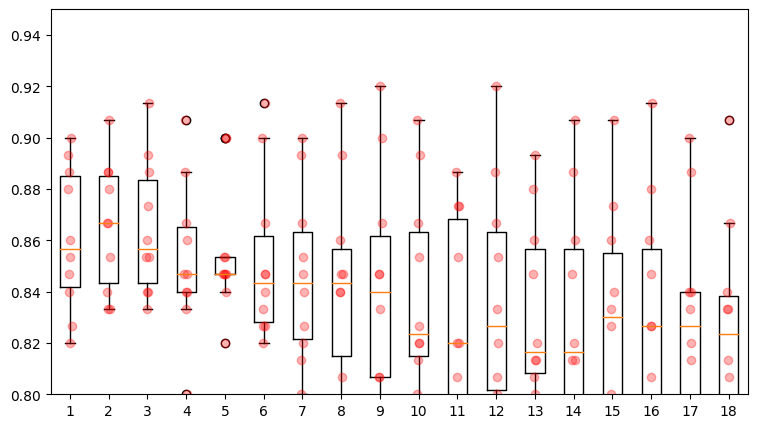

In [28]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from sklearn import metrics
from sklearn import tree
from sklearn import model_selection

#Create a toy problem
N=500
X = np.concatenate([1.25*np.random.randn(N,2),5+1.5*np.random.randn(N,2)]) 
X = np.concatenate([X,[8,5]+1.5*np.random.randn(N,2)])
y = np.concatenate([np.ones((N,1)),-np.ones((N,1))])
y = np.concatenate([y,np.ones((N,1))])

#Create a 10-fold cross validation set
kf=model_selection.KFold(n_splits=10, shuffle=True, random_state=0)
kf.get_n_splits()
      
#Search the parameter among the following
C=np.arange(2,20)

acc = np.zeros((10,18))
i=0
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    j=0
    for c in C:
        dt = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=c)
        dt.fit(X_train,y_train)
        yhat = dt.predict(X_val)
        acc[i][j] = metrics.accuracy_score(yhat, y_val)
        j=j+1
    i=i+1
    
plt.boxplot(acc);
for i in range(18):
    xderiv = (i+1)*np.ones(acc[:,i].shape)+(np.random.rand(10,)-0.5)*0.1
    plt.plot(xderiv,acc[:,i],'ro',alpha=0.3)


plt.ylim((0.80,0.95))
fig = plt.gcf()
fig.set_size_inches(9,5)

In [29]:
macc= np.mean(acc,axis=0)
idx=np.argmax(macc)
print ('Complexity: ' + str(idx+1) + ' with accuracy: ' + str(macc[idx]) )


Complexity: 2 with accuracy: 0.8653333333333333


What is the generalization error expected by selecting this method?

In [30]:
dt = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=idx+1)
dt.fit(X_train,y_train)

N=1000
#Let us check it out by generating out of sample data
X_test = np.concatenate([1.25*np.random.randn(N,2),5+1.5*np.random.randn(N,2)]) 
X_test = np.concatenate([X_test,[8,5]+1.5*np.random.randn(N,2)])
y_test = np.concatenate([np.ones((N,1)),-np.ones((N,1))])
y_test = np.concatenate([y_test,np.ones((N,1))])

yhat = dt.predict(X_test)
print (metrics.accuracy_score(yhat, y_test))


0.8846666666666667


### 4.1.1 Train, Test and Validation.

As we have seen the process of assessing the performance of the classifier by estimating the generalization error is called testing. And the process of selecting a model using the estimation of the generalization error is called validation. There is a subtle but critical difference in both and we have to be aware of it when dealing with our problem. 

+ Testing data is used only for assessing performance and will never be used in the learning process.
+ Validation data is used to explicitly select the parameter with best performance according to an estimation of the generalization error. This is a form of learning. 
+ Training data is used for learning the model instance from a model class.

In practice, we are given just training data, and in the most general case we have to explicitly tune some hyper-paramter. Thus, how do we select the different splits?

It will depend on the questions about the method we want to answer:

+ Let us say that our customer ask us to hand her a classifier for a given problem. If we just want to give him the best model then we may use cross-validation on our training data set and select the best performant model. In this scenario, when we return the trained classifier to our customer, we know that it is the one that achieves the best performance. But if the customer asks about the expected performance we can not say anything.

> **A practical issue:** once selected the model we use the complete training set to train the final model.

+ If we want to know the performance of our model we have to use unseen data. Thus, we may proceed in the following way:

    + Split the training set in training and testing data. For example, use $30\%$ of the training set for testing purposes. This data is hold out and will only be used to assess the performance of the method.

    + Use the remanining training data for selecting the hyper-parameters by means of cross-validation.
    
    + Train the model with the selected parameter and assess the performance using the testing data set.

> **A practical issue:** Observe that by splitting in three sets the classifier is trained with a smaller fraction of the data.

+ If we want to make a good comparison of classifiers but we do not care about the best parameters, we may use nested cross-validation. The external cross-validation is used for assessing the performance of the classifier and in each loop of the external cross-validation another cross-validation is run with the remaining training set for selecting the best parameters.

## 4.2 Cure II: Use regularization.

Regularization accounts for estimating the value of $\Omega$ in our out-of-sample inequality. In other words, it models the complexity of the technique. This usually becomes implicit in the algorithm but has huge consequences in real applications. There are two kinds of standard regularization strategies:

+ L2 regularization: Intuitively, L2 regularization is in many cases a surrogate of the notion of smoothness. In this sense, low complexity means smooth models.

+ L1 regularization: L1 regularization force sparse solution. This is useful for interpretability or when the number of parameters is so large that we only want a few active ones for computational issues. 

Although they are used to deal with overfitting, they trade-off with the error function in the objective and are governed by a hyper-parameter. Thus, we still have to select this parameter by means of model selection.

## 4.3 Cure III: Ensemble

A third cure to overfitting is to use ensemble techniques. The most well known are **Bagging** and **Boosting**. We will cover **Bagging** in another module.

# 5. What to do when ...

... our algorithm shows high **bias**.

- **Add more features** If we are able to engineer discriminant features, this might help the classifier to reduce its bias.
- **Use a more sophisticated model**. High bias usually means poor performance. If we are using a very simple model class, this might indicate that this model class is not able to properly fit training data. If our problem uses regularization for modeling complexity we might adjust the hyper-parameter to decrease the complexity.
- **Use fewer samples**. Although this will not improve the results, we might as well train the model with fewer data points just for improving training time without worsening the performance.


... our algorithm shows **high variance**.

- **Use fewer features**. Using a feature selection or dimensionality reduction techniques may be useful, and decrease the over-fitting of the estimator.
- **Use a simpler model**. High variance is usually synonim of closely modeling the training set. This can result in overfitting. In this case we can either use a simpler model class or adjust the regularization hyper-parameter to decrease complexity.
- **Use more training samples**. 
- **Use ensemble techniques**. Some ensemble techniques such as *bootstraping aggregation* are specifically designed to reduce classification variance.

# PART 3: Models in Machine Learning



# 9. Generative and discriminative models.

In literature we will find two complementary visions of the learning problem according to the problem they solve, generative vs discriminative models. 

+ **Generative models** goal is modeling the data. This consists of estimating the joint probability density function of $x,y$, $P(x,y)$. With this description, the problem of classification is selecting the model that maximizes the posterior probability of the labels given the data, $P(y|x)$. This is done by applying Bayes rule to relate the posterior distribution to the likelihood and the priors.

$$\underset{w}{\text{maximize}}\; P_w(y|x)$$

+ **Discriminative models** are concerned in finding a good approximation of the decision function even if it means losing the information about the concrete description of the data. In this setting we may find Maximum Likelihood Estimated methods such as logistic regression and other explicit function models such as SVM.

In this notebook we will introduce two very simple examples of each of those families. Both models are linear in the parameters and yield very simple decision boundaries, linear or quadratic boundaries.

Linear models are defined as $h: {\bf R}^n \rightarrow {\bf R}$ such that $h(x)=a^T x + b$, where $a,x \in {\bf R}^n$ and $b \in {\bf R}$. In this section we will review two very important models that are modeled as linear and apply them to a couple of problems.

# 9.A Support Vector Machines


Support Vector Machines (SVM) is a prototypical example of discriminative learning. In this setting one explicitly assumes a function model class of the boundary. The classical model for SVM is a linear model. SVM is not the only discriminative linear model, e.g. perceptron, logistic classifier, etc. But, it is probably the most complete problem formulation.

Let us first check the intuition behind SVM,

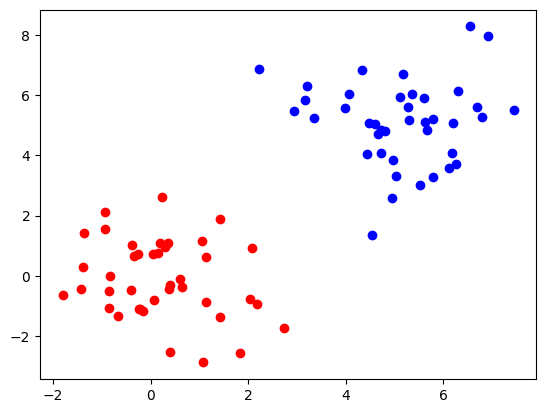

interactive(children=(FloatSlider(value=0.0, description='w0', max=10.0, min=-10.0), FloatSlider(value=0.0, de…

In [31]:
%matplotlib inline
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

class HLA():
    def __init__(self):
        np.random.seed(1)
        self.X = np.concatenate([1.25*np.random.randn(40,2),5+1.5*np.random.randn(40,2)]) 
        self.y = np.concatenate([np.ones((40,1)),-np.ones((40,1))])
        plt.scatter(self.X[0:40,0],self.X[0:40,1],color='r')
        plt.scatter(self.X[40:,0],self.X[40:,1],color='b') 
        delta = 0.025
        xx = np.arange(-5.0, 10.0, delta)
        yy = np.arange(-5.0, 10.0, delta)
        XX, YY = np.meshgrid(xx, yy)
        Xf = XX.flatten()
        Yf = YY.flatten()
        self.sz=XX.shape
        self.data = np.concatenate([Xf[:,np.newaxis],Yf[:,np.newaxis]],axis=1);

    def run(self,w0,w1,offset):
        w=np.array([w0,w1])
        w.shape=(2,1)
        Z = self.data.dot(w)+offset
        Z.shape=self.sz
        plt.scatter(self.X[0:40,0],self.X[0:40,1],color='r')
        plt.scatter(self.X[40:,0],self.X[40:,1],color='b')
        plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,10,-5,10),alpha=0.3, vmin=-30, vmax=30)
        XX = self.data[:,0].reshape(self.sz)
        YY = self.data[:,1].reshape(self.sz)
        plt.contour(XX,YY,Z,[0])
        fig = plt.gcf()
        fig.set_size_inches(9,9)
   

def decorator(w0,w1,offset):
    widget_hla.run(w0,w1,offset)
    
widget_hla = HLA()
interact(decorator, w0=(-10.,10.), w1=(-10.,10.), offset=(-20.,40.));


<div class = "alert alert-success">**QUESTION:** Using the former widget, check manually the following configurations:

<li> $(w_0,w_1,\text{offset}) = (-1.7, -3.1, 10)$
<li> $(w_0,w_1,\text{offset}) = (-3.7, -0.5, 10.3)$
<li> $(w_0,w_1,\text{offset}) = (-7.5, -3.2, 28.8)$
<p>
Which one of those configuration do you think yields a better boundary? Why?
</div>

<div class="alert alert-info">
**INTUITION:** The Support Vector Machine classifer finds the boundary with maximum distance/**margin** to both classes.</div>

Observations:
- It implicitly models the notion of noise. One expects that the boundary with maximum margin will be robust to small perturbations in the data.
- A maximum margin classifier has a unique solution in the separable case.

Let us check the result of fitting a SVM classifier using sklearn:

Number of support vectors: 3
(w0,w1) = [-7.58277576 -3.19765261]
offset = 28.697647407999817


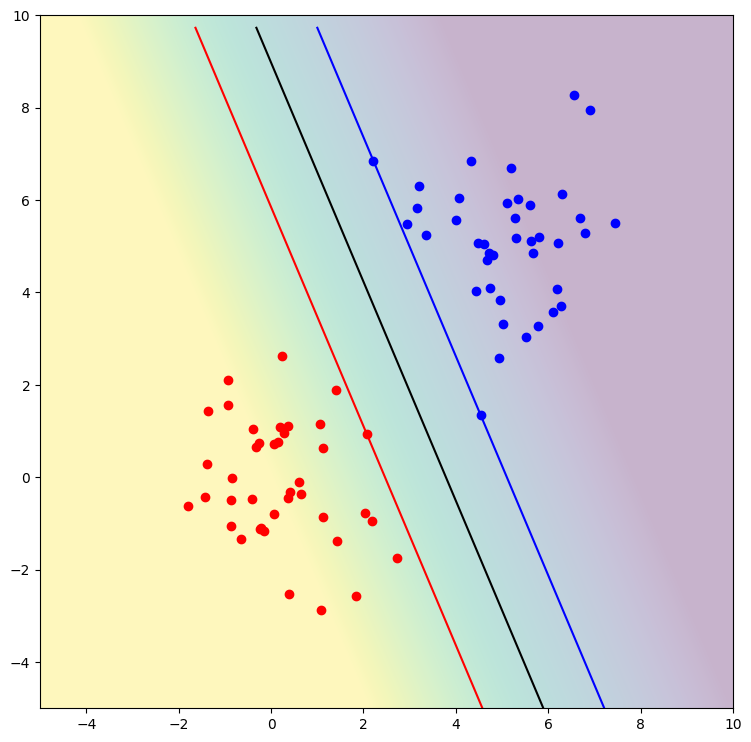

In [32]:


%reset -f
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from sklearn import svm

class svm_example():
    def __init__(self):
        '''Data creation'''
        np.random.seed(1)
        self.X = np.concatenate([1.25*np.random.randn(40,2),5+1.5*np.random.randn(40,2)]) 
        self.y = np.concatenate([np.ones((40,1)),-np.ones((40,1))])

    def run(self):
        '''Fit a linear SVM'''
        self.clf = svm.SVC(kernel='linear')
        self.clf.fit(self.X,self.y.ravel())
        
    def display(self):
        '''Display stuff'''
        delta = 0.25
        xx = np.arange(-5.0, 10.0, delta)
        yy = np.arange(-5.0, 10.0, delta)
        XX, YY = np.meshgrid(xx, yy)
        Xf = XX.flatten()
        Yf = YY.flatten()
        sz=XX.shape
        data = np.concatenate([Xf[:,np.newaxis],Yf[:,np.newaxis]],axis=1);
        Z=self.clf.decision_function(data)
        Z.shape=sz
        plt.scatter(self.X[0:40,0],self.X[0:40,1],color='r')
        plt.scatter(self.X[40:,0],self.X[40:,1],color='b')
        plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,10,-5,10),alpha=0.3, vmin=-3, vmax=3)
        XX = data[:,0].reshape(sz)
        YY = data[:,1].reshape(sz)
        plt.contour(XX,YY,Z,[-1,0,1],colors=['b','k','r'])
        fig = plt.gcf()
        fig.set_size_inches(9,9)
        print ('Number of support vectors: ' + str(np.sum(self.clf.n_support_)))
        plt.scatter(self.clf.support_vectors_[:, 0], 
           self.clf.support_vectors_[:, 1], 
           s=120, 
           facecolors='none', 
           linewidths=2,
           zorder=10)
        print ('(w0,w1) = ' + str(10*self.clf.coef_[0]))
        print ('offset = ' + str(10*self.clf.intercept_[0]))
        return XX,YY,Z



c = svm_example()
c.run()
XX,YY,Z=c.display()

Observe that there is a critical subset of data points. These are called **Support Vectors**. If any of those points disappear the boundary changes.  The decision boundary depends on the support vectors, thus we have to store them in our model.

Check the intuition in 3D:

In [33]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
np.random.seed(1)
X = np.concatenate([1.25*np.random.randn(40,2),5+1.5*np.random.randn(40,2)]) 
y = np.concatenate([np.ones((40,1)),-np.ones((40,1))])
def control3D(elevation,azimuth):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    fig.set_size_inches(12,12)
    ax.plot_surface(XX,YY,Z,cmap=cm.coolwarm,alpha=0.3,linewidth=0)
    ax.scatter(X[0:40,0],X[0:40,1],1,color='r')
    ax.scatter(X[40:,0],X[40:,1],-1,color='b')
    ax.contour(XX,YY,Z,[-1,0,1],colors=['b','k','r'])
    ax.view_init(elev=elevation, azim=azimuth)

#Ipython 2.0
interact(control3D,elevation=(0.,90.),azimuth=(0,360))
#Ipython 1.1
#elevation = 45
#azimuth = 180
#control3D(elevation,azimuth)

interactive(children=(FloatSlider(value=45.0, description='elevation', max=90.0), IntSlider(value=180, descrip…

<function __main__.control3D(elevation, azimuth)>

<div class = "alert alert-success">**QUESTIONS: **
<li> Set the azimuth to $113$ and elevation to $0$. Observe the data points and the relative position of the hyperplane. 
<li> Change the elevation to $90$. Describe this projection.
</div>

## 9.1 Modeling the Support Vector Machine.

### 9.1.1 Geometry of the hyperplane
A hyperplane in ${\bf R}^d$ is defined as an affine combination of the variables: $\pi\equiv a^Tx + b = 0$. 

Features:

+ A hyperplane splits the space in two half-spaces. The evaluation of the equation of the hyperplane on any element of one of the half-space is a positive value. It is a negative value for all the elements in the other half-space.
+ The distance of a point $x \in{\bf R}^d$ to the hyperplane $\pi$ is 
$$d(x,\pi)=\frac{a^Tx+b}{\|a\|_2}$$


### 9.1.2 Modeling the separating hyperplane
Given a binary classification problem with training data $\mathcal{D}=\{(x_i,y_i)\},\; i=1\dots N, \; y_i\in\{+1,-1\} $. Consider $\mathcal{S} \subseteq \mathcal{D}$ the subset of all data points belonging to class $+1$, $\mathcal{S}=\{x_i | y_i=+1\}$, and $\mathcal{R}=\{x_i | y_i=-1\}$ its complement. 

Then the problem of finding a separating hyperplane consists of fulfilling the following constraints

$$a^Ts_i+b>0\; \text{and}\; a^Tr_i+b<0 \quad \forall s_i\in\mathcal{S}, r_i\in\mathcal{R}.$$

Note the strict inequalities in the formulation. Informally, we can consider the smallest satisfied constraint. And observe that the rest must be satisfied with a larger value. Thus, we can arbitrarily set that value to 1 and rewrite the problem as $$a^Ts_i+b\geq 1\; \text{and}\; a^Tr_i+b\leq -1.$$

This is a *feasibility problem* and it is usually written in the following way in optimization standard notation

$$
\begin{align}
\text{minimize} & 1\\
\text{subject to} & a^T r_i + b \leq -1,\; \forall r_i \in \mathcal{R}\\
& a^T s_i + b \geq 1\; \forall s_i \in \mathcal{S}
\end{align}
$$

or in a compact way

$$
\begin{align}
\text{minimize} & 1\\
\text{subject to} & y_i (a^T x_i + b) \geq 1,\; \forall x_i \in \mathcal{D}\\
\end{align}
$$

The solution of this problem is not unique, e.g. remember all the parameters of the 'Human Learning Algorithm'.  

### 9.1.3 The maximum margin hyperplane

Selecting the maximum margin hyperplane requires to add a new constraint to our problem. Remember from the geometry of the hyperplane that the distance of any point to a hyperplane is given by $d(x,\pi)=\frac{a^Tx+b}{\|a\|_2}$. 

Recall that we want positive data to be beyond value 1 and negative data below -1. Thus, what is the distance value we want to maximize?

The positive point closest to the boundary is at $1/\|a\|_2$ and the negative point closest to the boundary data point is also at $1/\|a\|_2$. Thus data points from different classes are at least $2/\|a\|_2$ apart. 

Recall that our goal is to find the separating hyperplane with maximum margin, i.e. with maximum distance among elements from different classes. Thus, we can complete the former formulation with our last requirement as follows

$$
\begin{align}
\text{maximize} & 2/\|a\|_2 \\
\text{subject to} & y_i (a^T x_i + b) \geq 1,\; \forall x_i \in \mathcal{D}\\
\end{align}
$$

or equivalently,

$$
\begin{align}
\text{minimize} & \|a\|_2/2 \\
\text{subject to} & y_i (a^T x_i + b) \geq 1,\; \forall x_i \in \mathcal{D}\\
\end{align}
$$

This formulation has a solution as long as the problem is linearly separable.

### 9.1.4 Dealing with the non-separable case

In order to deal with misclassifications, we are going to introduce a new set of variables $\xi_i$, that represents the amount of violation in the $i-th$ constraint. If the constraint is already satisfied, then $\xi_i=0$, and $\xi_i>0$ otherwise. Because $\xi_i$ is related to the errors, we would like to keep this amount as close so zero as possible. This makes us introduce a element in the objective trading-off with the maximum margin.

The new model becomes

$$
\begin{align}
\text{minimize} & \|a\|_2/2 + C \sum\limits_{i=1}^N \xi_i\\
\text{subject to} & y_i (a^T x_i + b) \geq 1 - \xi_i,\; i=1\dots N\\
& \xi_i\geq 0
\end{align}
$$

where $C$ is the trade-off parameter that roughly balances margin and misclassification rate. This formulation is also called **soft-margin SVM**.

<div class="alert alert-info">**Take home ideas:**
<ul>
<li> Classical SVM fits a hyperplane separating boundary. </li>
<li> The hyperplane is defined to achieve the maximum margin. </li>
<li> If the problem is not linearly separable a new term related to the misclassification performance is introduced that trades-off with the margin. This trade-off is governed by parameter $C$ (or $\nu$ in $\nu$-SVM). </li>
</ul>
</div>

# CASE STUDY: Customer Churn Analysis

Modeling churn means to understand what keeps the customer engaged to our product. Its analysis goal is to predict or describe the **churn rate** i.e. the rate at which customer leave or cease the subscription to a service. Its value lies in the fact that engaging new customers is often more costly than retaining existing ones. For that reason subscription business-based companies usually have proactive policies towards customer retention.

In this case study, we aim at building a machine learning based model for customer churn prediction on data from a Telecom company. Each row on the dataset represents a subscribing telephone customer. Each column contains customer attributes such as phone number, call minutes used during different times of day, charges incurred for services, lifetime account duration, and whether or not the customer is still a customer.

This case is partially inspired in Eric Chiang's analysis of churn rate. Data is available from the University of California Irvine machine learning repositories data set.

The complete set of attributes is the following:

+ State: categorical, for the 50 states and the District of Columbia
+ Account length: integer-valued, how long an account has been active 
+ Area code: categorical
+ Phone number: customer ID
+ International Plan: binary feature, yes or no
+ VoiceMail Plan: binary feature, yes or no
+ Number of voice mail messages: integer-valued
+ Total day minutes: continuous, minutes customer used service during the day
+ Total day calls: integer-valued
+ Total day charge: continuous
+ Total evening minutes: continuous, minutes customer used service during the evening
+ Total evening calls: integer-valued
+ Total evening charge: continuous
+ Total night minutes: continuous, minutes customer used service during the night
+ Total night calls: integer-valued
+ Total night charge: continuous
+ Total international minutes: continuous, minutes customer used service to make international calls
+ Total international calls: integer-valued
+ Total international charge: continuous
+ Number of calls to customer service: integer-valued

In [45]:
from __future__ import division
import pandas as pd
import numpy as np

churn_df = pd.read_csv('churn.csv')
col_names = churn_df.columns.tolist()

print ("Column names:")
print (col_names)

to_show = col_names[:6] + col_names[-6:]

print ("\nSample data:")
churn_df[to_show].head(6)

Column names:
['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?']

Sample data:


,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,9.18,6.3,6,1.70,0,False.


In [46]:
# Isolate target data
churn_result = churn_df['Churn?']
y = np.where(churn_result == 'True.',1,0)

# We don't need these columns
to_drop = ['State','Phone','Churn?']
churn_feat_space = churn_df.drop(to_drop,axis=1)

# 'yes'/'no' has to be converted to boolean values
# NumPy converts these from boolean to 1. and 0. later
yes_no_cols = ["Int'l Plan","VMail Plan"]
churn_feat_space[yes_no_cols] = churn_feat_space[yes_no_cols] == 'yes'

# Pull out features for future use
features = churn_feat_space.columns

X = churn_feat_space.values.astype(np.float)

print ("Feature space holds %d observations and %d features" % X.shape)
print ("Unique target labels:", np.unique(y))

Feature space holds 3333 observations and 18 features
Unique target labels: [0 1]


/var/folders/sz/_0qpnyfj2mdfnd1kvwj9py200000gn/T/ipykernel_19379/1219425965.py:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = churn_feat_space.values.astype(np.float)


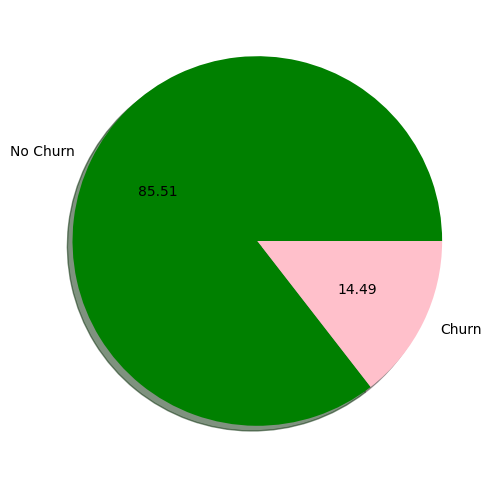

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.pie(np.c_[len(y)-np.sum(y),np.sum(y)][0],labels=['No Churn','Churn'],colors=['green','pink'],shadow=True,autopct ='%.2f' )
fig = plt.gcf()
fig.set_size_inches(6,6)

In [49]:
#Save data for future use.
import pickle
ofname = open('churn_data.pkl', 'wb')
s = pickle.dump([X,y,features],ofname)
ofname.close()

<div class = "alert alert-success">**QUESTION: ** This kind of datasets are called **unbalanced** datasets. Name a trivial classifier with "good" accuracy in this data set?
</div>

<div class = "alert alert-info">
**Unbalanced datasets**
<p>
The unbalanced term describes the condition of the data where the ratio between the sizes of the positive and negative is a small value. In those scenarios, always predicting the majority class usually yields good accuracy performance, though it is ill informative. This kind of problems is very common when we want to model unusual events such as rare diseases, the occurrence of a failure in machinery, credit card fraud operations, etc. In those scenarios gathering data from usual events is very easy but collecting data from unusual events is difficult and results in a comparatively small size data set. In order to measure the performance on those data sets one has to use other performance metrics, such as specificity or positive predictive value on the minority class. In the end, the value of a misclassification of a sample depends on the application and the user. For example, in cancer detection because the cost of missing one patient in a trial is very large, we want the predictor to have very large sensitivity (we do not accept false negatives) though it means accepting more false positives. These false positives can be discarded in subsequent tests. 
</div>

In [50]:
#Recover Churn data
import pickle
fname = open('churn_data.pkl','rb')
data = pickle.load(fname)
X = data[0]
y = data[1]
print ('Loading ok.')

Loading ok.


In [51]:
from sklearn import svm
from sklearn import model_selection
from sklearn import metrics


acc = np.zeros((5,))
i=0
kf=model_selection.KFold(n_splits=5, shuffle=True, random_state=0)
kf.get_n_splits()
#We will build the predicted y from the partial predictions on the test of each of the folds
yhat = y.copy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = svm.SVC(kernel='linear')
    clf.fit(X_train,y_train)
    yhat[test_index] = clf.predict(X_test)
    acc[i] = metrics.accuracy_score(yhat[test_index], y_test)
    i=i+1
print ('Mean accuracy: '+ str(np.mean(acc)))

Mean accuracy: 0.8589853721787755


/var/folders/sz/_0qpnyfj2mdfnd1kvwj9py200000gn/T/ipykernel_19379/3338893031.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels, size=20)
/var/folders/sz/_0qpnyfj2mdfnd1kvwj9py200000gn/T/ipykernel_19379/3338893031.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels, size=20)


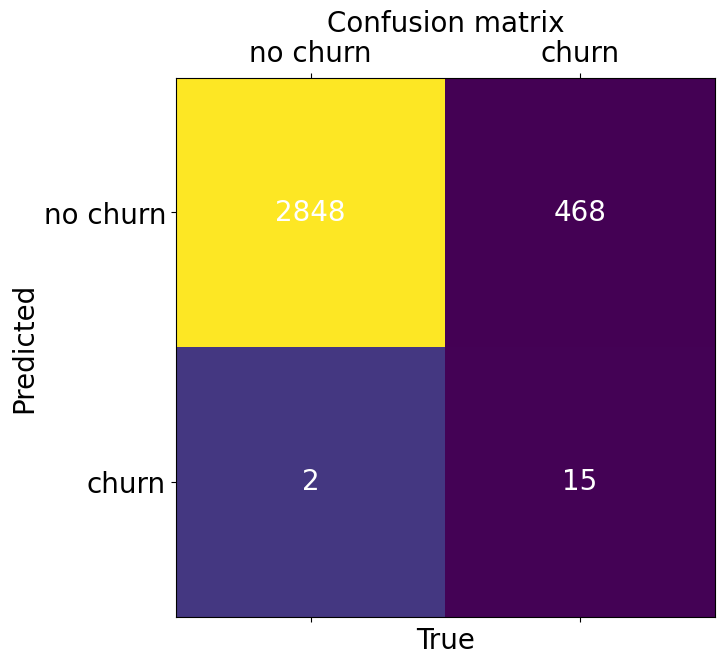

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2850
           1       0.88      0.03      0.06       483

    accuracy                           0.86      3333
   macro avg       0.87      0.52      0.49      3333
weighted avg       0.86      0.86      0.80      3333



In [53]:
def draw_confusion(y,yhat,labels):
    cm = metrics.confusion_matrix(y, yhat)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.matshow(cm)
    plt.title('Confusion matrix',size=20)
    ax.set_xticklabels([''] + labels, size=20)
    ax.set_yticklabels([''] + labels, size=20)
    plt.ylabel('Predicted',size=20)
    plt.xlabel('True',size=20)
    for i in range(2):
        for j in range(2):
            ax.text(i, j, cm[i,j], va='center', ha='center',color='white',size=20)
    fig.set_size_inches(7,7)
    plt.show()

draw_confusion(y,yhat,['no churn', 'churn'])
print (metrics.classification_report(y,yhat))

Bad!!!

In [54]:
# Standarize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [60]:
from sklearn import metrics
acc_snooping = np.zeros((5,))
i=0
kf=model_selection.KFold(n_splits=5, shuffle=True, random_state=0)
kf.get_n_splits()
#We will build the predicted y from the partial predictions on the test of each of the folds
yhat = y.copy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = svm.SVC(kernel='linear')
    clf.fit(X_train,y_train)
    yhat[test_index] = clf.predict(X_test)
    acc_snooping[i] = metrics.accuracy_score(yhat[test_index], y_test)
    i=i+1
print ('Mean accuracy: '+ str(np.mean(acc_snooping)))

Mean accuracy: 0.8550846198522359


/var/folders/sz/_0qpnyfj2mdfnd1kvwj9py200000gn/T/ipykernel_19379/3338893031.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels, size=20)
/var/folders/sz/_0qpnyfj2mdfnd1kvwj9py200000gn/T/ipykernel_19379/3338893031.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels, size=20)


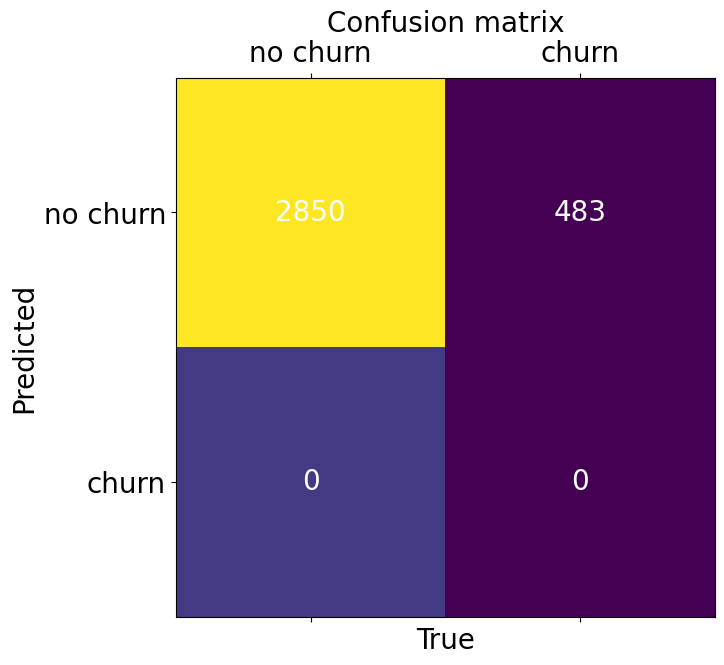

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2850
           1       0.00      0.00      0.00       483

    accuracy                           0.86      3333
   macro avg       0.43      0.50      0.46      3333
weighted avg       0.73      0.86      0.79      3333



/Users/oriol/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/oriol/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/oriol/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:

draw_confusion(y,yhat,['no churn', 'churn'])
print (metrics.classification_report(y,yhat))

<div class = "alert alert-success">**QUESTION: ** Add class_weight={1:10.0} to the constructor.
</div>

**TALK ABOUT OPERATIONAL POINT and CLASS WEIGHT**

Let us introduce (verbaly the ROC curve and the PR curve) and the operational point.

We have seen that a linear model in the parameters can model non-linear boundaries provided we **explicitly** map original data non-linearly. For example, we can create a linear model with features squared. This will lead to a quadratic boundary with respect to the original space. There is another way of **implicitly** encoding non-linearities by means of **kernels**.

The kernel encodes the notion of similarity between two data points. 

The change in the formulation involve the introduction of several concepts from mathematical analysis. For the sake of simplicity, we will skip the details (read "The story of a kernel" in the following paragraph or ask any detail if you are curious).

As a result, any regularized cost function optimization problem such as SVM has a solution of following form,

$$f(x) = \sum\limits_{i=1}^N \alpha_i k(x_i,x)$$


<div class = "alert alert-info">**The story of a kernel**
<p>
*Disclaimer: This is  a highly mathematically non rigorous story of how kernels come into play in machine learning.*
<p>
At some point we talked about keeping complexity in check. For that purpose we need to measure complexity. And we saw that certain models, such as linear models can control it using the norm of weights. To the fact of adding this penalty to the objective function we are optimizing is called *regularization*.
<p>
However, it would be great to be able to measure the complexity of any function. To address this issue we have to resort to functional analysis. Functional analysis is a brach of mathematical analyisis that deals with spaces of functions. For that purpose a Hilbert space must be introduced so that similarity and distance among functions can be measured. A Hilbert space is a complete vector space with inner product. Intuitively, it generalizes the classical Euclidean space to infinite dimensions, and thus, to functional spaces.
<p>
One particular functional space is the Reproducing Kernel Hilbert Space (RKHS). In this space a function evaluated on a point $x$ is defined by the inner product of the function and the kernel evaluated on that point, i.e. $f(x) = \langle f(\cdot),K(x,\cdot) \rangle$, where $K$ is the kernel. This is called Riesz representation and it is the key for showing the most important result for our problems, *The Representer's theorem*.
<p>
The Respresenter's theorem states that the solution of any problem with the following form 
$$
	f^*=\underset{f\in \mathcal{H}}{\operatorname{arg\,min}}\frac{1}{n}\sum_i{\mathcal{L}(f(x_i),y_i)}+\lambda\|f\|_{\mathcal{H}}^2
	$$
is given by
$$f(x) = \sum\limits_{i=1}^N \alpha_i k(x_i,x)$$
where $x_i$ are our samples. 
</div>

The kernel has to be a positive semi-definite function, such as:

+ Linear kernel: $$k(x_i,x_j) = x_i^Tx_j$$
+ Polynomial kernel: $$k(x_i,x_j) = (1+ x_i^Tx_j)^p$$
+ Radial Basis Function kernel $$k(x_i,x_j) = e^{-\frac{\|x_i-x_j\|^2}{2\sigma^2}}$$


<div class = "alert alert-error"> On a practical side you can define a kernel by using your favorite distance $d(x_i,x_j)$ and defining the kernel as
$$k(x_i,x_j) = e^{-\gamma d(x_i,x_j)}, \quad \gamma>0$$
where $\gamma$ is a hyper-parameter that controls the decay of the exponential (we will tune it using cross-validation). Observe that RBF is an instantiation of this more general rule.
</div>

As comented before, kernels implicitly encode a non-linear transformation and remember that SVM finds the optimal hyperplane. By combining both concepts we have a linear method applied on a data on a transformed space, but we do not have to provide the explicit transformation.

This becomes incredibly useful when one realizes that the feature mapping from a radial basis function kernel is a maping into a $\infty$-dimensional space.

Le us build our intuition about how kernels work with the following video:

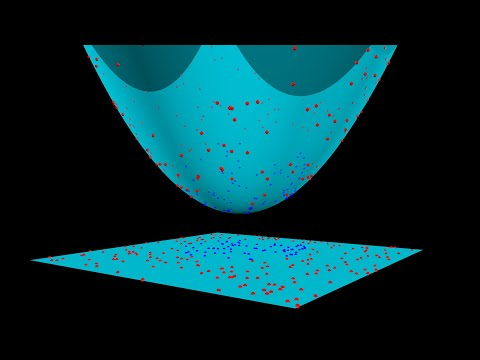

In [63]:
from IPython.display import YouTubeVideo
YouTubeVideo('3liCbRZPrZA', size=700)

In [64]:
%reset -f
#Recover Churn data
import pickle
fname = open('churn_data.pkl','rb')
data = pickle.load(fname)
X = data[0]
y = data[1]
features = data[2]
print ('Loading ok.')

Loading ok.


In [65]:
#NO SNOOPING
import numpy as np
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn import metrics



kf=model_selection.KFold(n_splits=5,  shuffle=True, random_state=0)
kf.get_n_splits(X)
acc = np.zeros((5,))
i=0
#We will build the predicted y from the partial predictions on the test of each of the folds
yhat = y.copy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    #Standard parameters
    clf = svm.SVC(kernel='rbf', gamma = 0.051, C = 1)
    clf.fit(X_train,y_train.ravel())
    X_test = scaler.transform(X_test)
    yhat[test_index] = clf.predict(X_test)
    acc[i] = metrics.accuracy_score(yhat[test_index], y_test)
    i=i+1
print ('Mean accuracy: '+ str(np.mean(acc)))

Mean accuracy: 0.9141870506188348


/var/folders/sz/_0qpnyfj2mdfnd1kvwj9py200000gn/T/ipykernel_19379/1347475485.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels, size=20)
/var/folders/sz/_0qpnyfj2mdfnd1kvwj9py200000gn/T/ipykernel_19379/1347475485.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels, size=20)


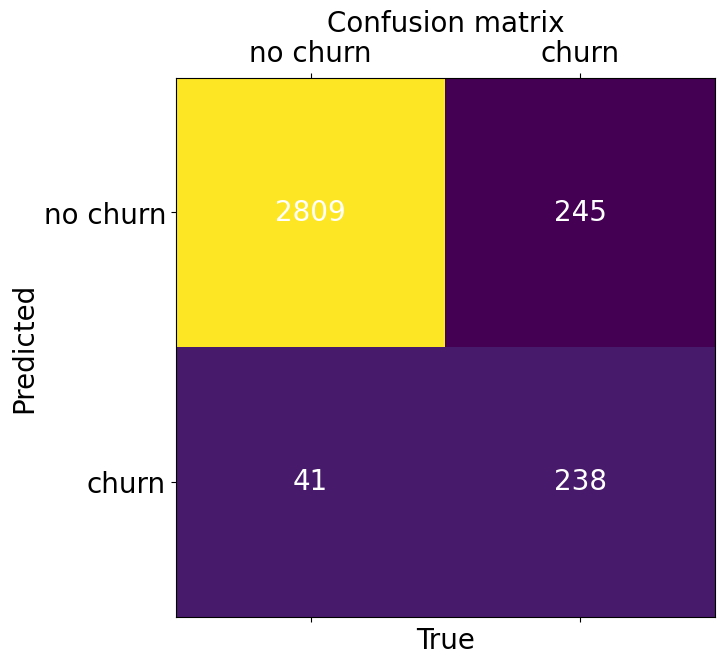

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2850
           1       0.85      0.49      0.62       483

    accuracy                           0.91      3333
   macro avg       0.89      0.74      0.79      3333
weighted avg       0.91      0.91      0.90      3333



In [66]:
import matplotlib.pyplot as plt
def draw_confusion(y,yhat,labels):
    cm = metrics.confusion_matrix(y, yhat)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.matshow(cm)
    plt.title('Confusion matrix',size=20)
    ax.set_xticklabels([''] + labels, size=20)
    ax.set_yticklabels([''] + labels, size=20)
    plt.ylabel('Predicted',size=20)
    plt.xlabel('True',size=20)
    for i in range(2):
        for j in range(2):
            ax.text(i, j, cm[i,j], va='center', ha='center',color='white',size=20)
    fig.set_size_inches(7,7)
    plt.show()

draw_confusion(y,yhat,['no churn', 'churn'])
print (metrics.classification_report(y,yhat))

In [ ]:
#from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
parameters = {'C':[ 2,4,8],'gamma':[0.02, 0.05, 0.1], 'class_weight':[{0:0.5},{0:1},{0:2}]}

kf=model_selection.KFold( n_splits=5, shuffle=True, random_state=0)
kf.get_n_splits(X)
acc = np.zeros((5,))
i=0
#We will build the predicted y from the partial predictions on the test of each of the folds
yhat = y.copy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    #Standard parameters
    clf = svm.SVC(kernel='rbf', class_weight={0:1,1:10})
    # We can change the scoring "average_precision", "recall", "f1"
    clf = model_selection.GridSearchCV(clf, parameters, scoring='average_precision')
    clf.fit(X_train,y_train.ravel())
    X_test = scaler.transform(X_test)
    yhat[test_index] = clf.predict(X_test)
    #recall, f1, precision
    acc[i] = metrics.accuracy_score(yhat[test_index], y_test)
    print (str(clf.best_params_))
    i=i+1
print ('Mean accuracy: '+ str(np.mean(acc)))

{'C': 4, 'class_weight': {0: 0.5}, 'gamma': 0.05}
{'C': 4, 'class_weight': {0: 0.5}, 'gamma': 0.05}
{'C': 4, 'class_weight': {0: 0.5}, 'gamma': 0.05}
{'C': 4, 'class_weight': {0: 2}, 'gamma': 0.05}


In [ ]:
import matplotlib.pyplot as plt
def draw_confusion(y,yhat,labels):
    cm = metrics.confusion_matrix(y, yhat)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.matshow(cm)
    plt.title('Confusion matrix',size=20)
    ax.set_xticklabels([''] + labels, size=20)
    ax.set_yticklabels([''] + labels, size=20)
    plt.ylabel('Predicted',size=20)
    plt.xlabel('True',size=20)
    for i in range(2):
        for j in range(2):
            ax.text(i, j, cm[i,j], va='center', ha='center',color='white',size=20)
    fig.set_size_inches(7,7)
    plt.show()

draw_confusion(y,yhat,['no churn', 'churn'])
print (metrics.classification_report(y,yhat))

<div class = "alert alert-success"> **QUESTION:** We are dealing with an unbalanced problem. Change the code to bias the model to deal with unbalancing.
</div>

## 9.B Introduction to ensemble learning

When we want to purchase a product we usually read user's reviews. Before undergoing a major surjery procedure we seek the opinion of different experts. Ensemble learning mimicks one of the human uncertainty reduction mechanism, seeking additional opinions before making a major decision.

Ensemble learning is divided in two steps:

1. Train a set of classifiers
2. Aggregate their results

There are different reasons for using ensemble learning in practice:

1. **Statistical reasons:** The combination of outputs of different classifiers may reduce the risk of an unfortunate selection of a poorly performing classifier.
2. **Large scale data sets:** It makes little sense to only have one classifier on very large sets of data. Partition data in smaller subsets and aggregate seems like a good idea.
3. **Divide and conquer:** Some problems too difficult for a single classifier to solve. The decision boundary may be too complex or lie outside the space of functions of the classifier.
4. **Data fusion:** Different source fusion is usually a problem. One usually faces data coming from heterogeneous sources and the question is how to fuse these data. One solution is to train one classifier per source and the fuse the decision of those experts.

## 9.2 Diversity

One condition required for the system to work is that errors on different classifiers should be made on different samples in order for the strategic combination of the classifiers to correct possible errors in the judgement of the class o a particular instance. This effect has been called **diversity**.

Diversity can be obtained in different ways:

+ Using different training sets. Use resampling strategies to obtain different optimal classifiers. This effect is correlated with the notion of stability of the classifier and the concept of bias and variance of the classifier.
+ Using different training parameters for different classifiers
+ Combining different architectures. (i.e. svm, decission trees, ...)
+ Training on different features. (i.e. random subspaces or random projections)

## 9.2.1 Bootstrapping aggregation 

Bootstrapping means resampling the training data set with replacement. Usually the same number of data as the original data set is used.

**Bootstrapping aggreagtion (aka. Bagging)** is a ensemble technique that uses multiple bootstrapped copies of the training set to build a set of classifiers. One classifier for each bootstrapped training copy. And then, use a combination technique, such as majority voting, in order to take the final decision.

In [ ]:
#Let us train an overfitted classifier. For example an SVC.
%reset -f
import numpy as np
import matplotlib.pyplot as plt
MAXN=60
np.random.seed(2)
X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
X = np.concatenate([X,[8,5]+1.5*np.random.randn(MAXN,2)])
y = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
y = np.concatenate([y,np.ones((MAXN,1))])
idxplus = y==1
idxminus = y==-1

from sklearn import tree
from sklearn import metrics

x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]


clf = tree.DecisionTreeClassifier(criterion="entropy", min_samples_split=2)
clf.fit(X,y.ravel())
Z=clf.predict(data)
mx= np.max(Z)
mn= np.min(Z)
Z.shape=sz
plt.scatter(X[idxplus.ravel(),0],X[idxplus.ravel(),1],color='r')
plt.scatter(X[idxminus.ravel(),0],X[idxminus.ravel(),1],color='b')
plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=mn, vmax=mx)
plt.colorbar()
plt.contour(XX,YY,Z,[0])

fig = plt.gcf()
fig.set_size_inches(9,9)

In [ ]:
from sklearn import tree
def train_bagged_tree(X,y,C):
    clf_list=[]
    for i in range(C):
        np.random.seed(None)
        idx=np.random.randint(0,y.shape[0],y.shape[0])
        clf = tree.DecisionTreeClassifier(criterion="entropy")
        Xr=X[idx,:]
        yr=y[idx]
        clf_list.append((clf.fit(Xr,yr.ravel()),idx))  #Add the indices for visualization purposes in test
    return clf_list


def visualize_bagged_tree(X,y,clf_list):
    C = len(clf_list)
    x = np.linspace(-5,15,200)
    XX,YY = np.meshgrid(x,x)
    sz=XX.shape
    data=np.c_[XX.ravel(),YY.ravel()]
    yhat=np.zeros((data.shape[0],len(clf_list)))
    i=0
    for dt,idx in clf_list:
        yhat[:,i]=dt.predict(data)
        Xr=X[idx,:]
        yr=y[idx]
        mx= np.max(yhat[:,i])
        mn= np.min(yhat[:,i])
        plt.subplot(int(np.floor(C/4))+1,4,i+1)
        plt.scatter(Xr[(yr==1).ravel(),0],Xr[(yr==1).ravel(),1],color='r')
        plt.scatter(Xr[(yr==-1).ravel(),0],Xr[(yr==-1).ravel(),1],color='b')
        plt.imshow(yhat[:,i].reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=mn, vmax=mx)
        plt.contour(XX,YY,yhat[:,i].reshape(sz),[0])
        i=i+1
    fig = plt.gcf()
    fig.set_size_inches(20,7*int(np.floor(C/4))+1)
    return yhat


clf_list=train_bagged_tree(X,y,16)
y_pred=visualize_bagged_tree(X,y,clf_list)
y_pred = np.sum(y_pred,axis=1)

print ('Process finnished.')


In [ ]:
mx= np.max(y_pred)
mn= np.min(y_pred)
Zb = y_pred.reshape(sz)
plt.subplot(1,2,1)
plt.scatter(X[idxplus.ravel(),0],X[idxplus.ravel(),1],color='r')
plt.scatter(X[idxminus.ravel(),0],X[idxminus.ravel(),1],color='b')
plt.imshow(Zb, interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=mn, vmax=mx)
plt.contour(XX,YY,Zb,[0])
plt.subplot(1,2,2)
plt.scatter(X[idxplus.ravel(),0],X[idxplus.ravel(),1],color='r')
plt.scatter(X[idxminus.ravel(),0],X[idxminus.ravel(),1],color='b')
plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=-1, vmax=1)
plt.contour(XX,YY,Z,[0])
fig = plt.gcf()
fig.set_size_inches(16,9)

### 9.2.1 Application to customer churn prediction


In [77]:
%reset -f
#Recover Churn data
import pickle
fname = open('churn_data.pkl','rb')
data = pickle.load(fname)
X = data[0]
y = 2*data[1]-1
features = data[2]
print ('Loading ok.')

Loading ok.


In [78]:
def train_bagged_tree(X,y,C):
    clf_list=[]
    for i in range(C):
        np.random.seed(None)
        idx=np.random.randint(0,y.shape[0],y.shape[0])
        clf = tree.DecisionTreeClassifier(criterion="entropy")
        Xr=X[idx,:]
        yr=y[idx]
        clf_list.append(clf.fit(Xr,yr.ravel()))  
    return clf_list


def test_bagged_tree(X,clf_list):
    yhat=np.zeros((X.shape[0],len(clf_list)))
    i=0
    for dt in clf_list:
        yhat[:,i]=dt.predict(X)
        i=i+1
    return np.sign(np.mean(yhat,axis=1))

In [80]:
#NO SNOOPING
import numpy as np
from sklearn import model_selection
from sklearn import tree
from sklearn import metrics

kf=model_selection.KFold(n_splits=5, shuffle=True, random_state=0)
kf.get_n_splits(X)
acc = np.zeros((5,))
i=0
#We will build the predicted y from the partial predictions on the test of each of the folds
yhat = y.copy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_list = train_bagged_tree(X_train,y_train.ravel(),21)
    yhat[test_index]=test_bagged_tree(X_test,clf_list) 
    acc[i] = metrics.accuracy_score(yhat[test_index], y_test)
    i=i+1
print ('Mean accuracy: '+ str(np.mean(acc)))

Mean accuracy: 0.9549950250100174


/var/folders/sz/_0qpnyfj2mdfnd1kvwj9py200000gn/T/ipykernel_18604/2422236388.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels, size=20)
/var/folders/sz/_0qpnyfj2mdfnd1kvwj9py200000gn/T/ipykernel_18604/2422236388.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels, size=20)


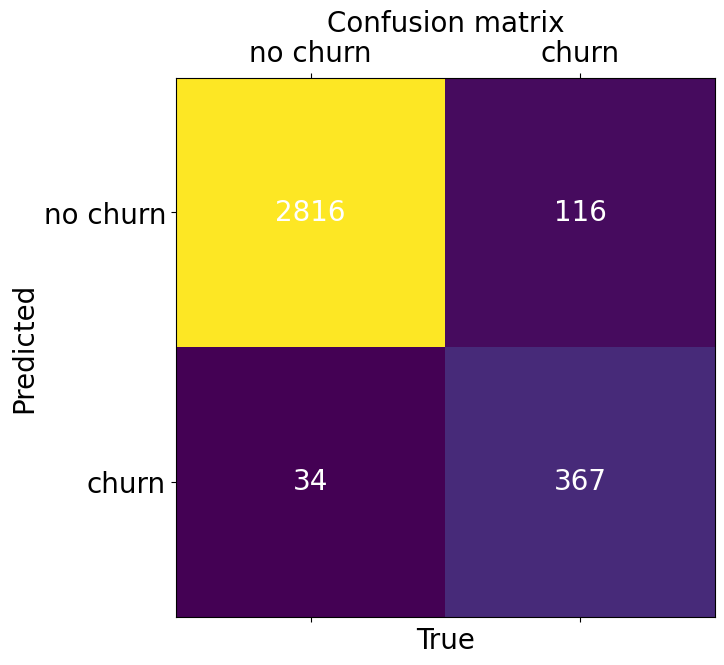

              precision    recall  f1-score   support

          -1       0.96      0.99      0.97      2850
           1       0.92      0.76      0.83       483

    accuracy                           0.95      3333
   macro avg       0.94      0.87      0.90      3333
weighted avg       0.95      0.95      0.95      3333



In [81]:
import matplotlib.pyplot as plt
def draw_confusion(y,yhat,labels):
    cm = metrics.confusion_matrix(y, yhat)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.matshow(cm.T)
    plt.title('Confusion matrix',size=20)
    ax.set_xticklabels([''] + labels, size=20)
    ax.set_yticklabels([''] + labels, size=20)
    plt.ylabel('Predicted',size=20)
    plt.xlabel('True',size=20)
    for i in range(2):
        for j in range(2):
            ax.text(i, j, cm[i,j], va='center', ha='center',color='white',size=20)
    fig.set_size_inches(7,7)
    plt.show()

draw_confusion(y,yhat,['no churn', 'churn'])
print (metrics.classification_report(y,yhat))

## 1.3. Random Forest

Random Forest technique introduces a randomization over the feature selected for building  each tree in the ensemble in order to improve diversity in an attempt to reduce variance evan more. Let us code this variant of bagging.

In [82]:
%reset -f
from sklearn import tree
import numpy as np
def train_random_forest(X,y,C,F):
    F=int(np.ceil(np.sqrt(X.shape[1])))
    clf_list=[]
    for i in range(C):
        np.random.seed(None)
        idx=np.random.randint(0,y.shape[0],y.shape[0])
        feat_idx=np.random.permutation(np.arange(X.shape[1]))[:F]
        clf = tree.DecisionTreeClassifier(criterion="entropy")
        Xr=X[idx,:].copy()
        Xr=Xr[:,feat_idx]
        yr=y[idx]
        clf_list.append((clf.fit(Xr,yr.ravel()),feat_idx))
    return clf_list


def test_random_forest(X,clf_list):
    yhat=np.zeros((X.shape[0],len(clf_list)))
    i=0
    for dt,feat_idx in clf_list:
        yhat[:,i]=dt.predict(X[:,feat_idx])
        i=i+1
    return np.sign(np.mean(yhat,axis=1)),yhat

In [83]:
#Recover Churn data
import pickle
fname = open('churn_data.pkl','rb')
data = pickle.load(fname)
X = data[0]
y = 2*data[1]-1
print ('Labels: '+ str(np.unique(y)))
features = data[2]
print ('Loading ok.')

Labels: [-1  1]
Loading ok.


In [85]:
#NO SNOOPING
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import ensemble
from sklearn import metrics


kf=model_selection.KFold(n_splits=5, shuffle=True, random_state=0)
kf.get_n_splits(X)
acc = np.zeros((5,))
i=0
#We will build the predicted y from the partial predictions on the test of each of the folds
yhat = y.copy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    dt = ensemble.RandomForestClassifier(n_estimators=51)
    dt.fit(X_train,y_train)
    yhat[test_index]=dt.predict(X_test)
    #clf_list = train_random_forest(X_train,y_train,51,np.ceil(np.sqrt(X.shape[1])))
    #yhat[test_index],yk = test_random_forest(X_test,clf_list)
    acc[i] = metrics.accuracy_score(yhat[test_index], y_test)
    i=i+1
print (acc)
print (np.unique(yhat))
print (np.unique(y_test))
print ('Mean accuracy: '+ str(np.mean(acc)))

[0.95502249 0.95652174 0.93703148 0.95495495 0.95345345]
[-1  1]
[-1  1]
Mean accuracy: 0.9513968241104672


/var/folders/sz/_0qpnyfj2mdfnd1kvwj9py200000gn/T/ipykernel_18604/926181432.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels, size=20)
/var/folders/sz/_0qpnyfj2mdfnd1kvwj9py200000gn/T/ipykernel_18604/926181432.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels, size=20)


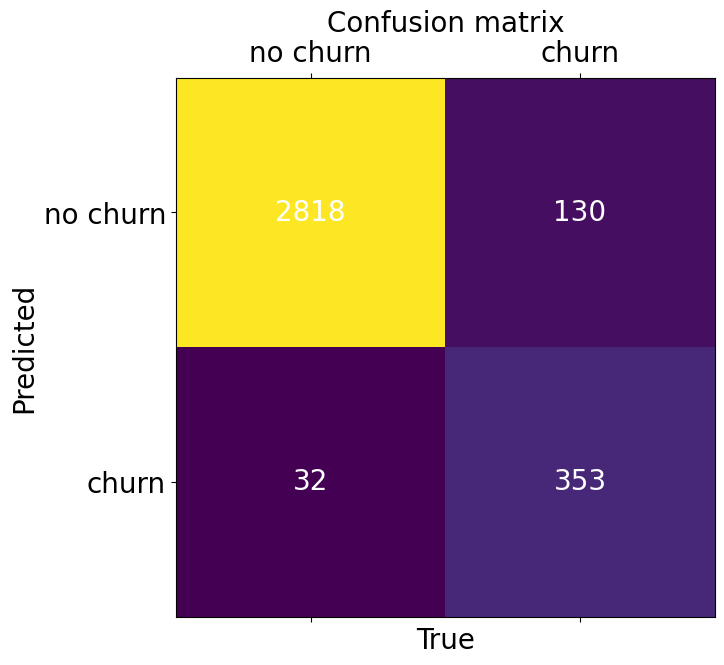

              precision    recall  f1-score   support

          -1       0.96      0.99      0.97      2850
           1       0.92      0.73      0.81       483

    accuracy                           0.95      3333
   macro avg       0.94      0.86      0.89      3333
weighted avg       0.95      0.95      0.95      3333



In [86]:
import matplotlib.pyplot as plt
def draw_confusion(y,yhat,labels):
    cm = metrics.confusion_matrix(y, yhat)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.matshow(cm.T)
    plt.title('Confusion matrix',size=20)
    ax.set_xticklabels([''] + labels, size=20)
    ax.set_yticklabels([''] + labels, size=20)
    plt.ylabel('Predicted',size=20)
    plt.xlabel('True',size=20)
    for i in range(2):
        for j in range(2):
            ax.text(i, j, cm[i,j], va='center', ha='center',color='white',size=20)
    fig.set_size_inches(7,7)
    plt.show()
draw_confusion(y,yhat,['no churn', 'churn'])
print (metrics.classification_report(y,yhat))